# Statistik für das Projek „Mathe für Nicht-Freaks“ im Jahr 2018

Scrolle runter, um die Statistik zu sehen.

In [1]:
import requests
import locale
import matplotlib.pyplot as plt
import numpy as np

locale.setlocale(locale.LC_ALL, 'de_DE.utf8')

from IPython.display import display, Markdown, HTML

In [14]:
def display_markdown(markdown):
    display(Markdown(markdown))
    
def display_html(html):
    display(HTML(html))
    
def h(title, level=1, hid=None):
    html = "<h" + str(level)
    
    if hid:
        html += " id='" + hid + "'"
    
    html += ">"
    html += title
    html += "</h" + str(level) + ">"
    
    display_html(html)
    
def d(x):
    return locale.format("%9d", x, grouping=True)

def diff(a,b):
    return locale.format("%+9d", a-b, grouping=True)

def dq(x):
    return "%3.0f%%" % x

def diffq(a,b):
    return dq(a-b)

def quot(a,b):
    if b != 0:
        return "(%+3.0f%%)" % ((a-b)/b*100)
    else:
        return " " * 7

In [3]:
import requests

from importlib import reload

import api
reload(api)

from sitemap import parse_sitemap
from api import MediaWikiSession, MediaWikiAPI
from cachecontrol import CacheControl

req_session = CacheControl(requests.session())

wb = MediaWikiAPI(MediaWikiSession("de.wikibooks.org", req_session))
wp = MediaWikiAPI(MediaWikiSession("de.wikipedia.org", req_session))

In [4]:
sitemap_code = wb.get_content("Mathe für Nicht-Freaks: Sitemap")
sitemap = parse_sitemap(sitemap_code)
sitemap["name"] = "Mathe für Nicht-Freaks"
sitemap["link"] = "Mathe für Nicht-Freaks"

In [5]:
def node_func(func):
    def result_func(node):
        if "link" in node and node["link"]:
            if id(func) not in node:
                node[id(func)] = func(node["link"])
                
            return node[id(func)]
        else:
            return None
    
    return result_func

def collect(func, node):
    result = func(node)
    if result != None:
        result = [result]
    else:
        result = []
    
    for child in node["children"]:
        result += collect(func, child)
    
    return result

def collect_pd(func, node):
    return pd.Series(collect(func, node))

def wb_views(start, end):
    return node_func(lambda x: wb.pageviews(x,start,end))

def wb_rev_count(start, end):
    return node_func(lambda x: wb.revisions_count(x,start,end))

In [6]:
@node_func
def authors_new(link):
    return wb.authors(link, "2018", "2019")

@node_func
def authors_old(link):
    return wb.authors(link, "2017", "2018")

def collect_authors(authors_func, node):
    result = authors_func(node)
    
    if not result:
        result = {}
    else:
        result = dict(result.items())
        
    for child in node["children"]:
        child_result = collect_authors(authors_func, child)
        
        for k,v in child_result.items():
            if k not in result:
                result[k] = 0
            
            result[k] += v
    
    return result

In [7]:
views_new = wb_views("20180101", "20181231")
views_old = wb_views("20170101", "20171231")

In [8]:
revs_new = wb_rev_count("2018", "2019")
revs_old = wb_rev_count("2017", "2018")

In [9]:
@node_func
def views_diff(link):
    return  wb.pageviews(link,"20180101", "20181231") -  wb.pageviews(link,"20170101", "20171231")

@node_func
def revs_diff(link):
    return  wb.revisions_count(link,"2018", "2019") -  wb.revisions_count(link,"2017", "2018")

In [10]:
def wikipedia_title(x):
    params = {
        "action":"wbgetentities",
        "sites":"dewikibooks",
        "titles":x,
        "props":"sitelinks",
        "languages":"nn",
        "format":"json"
    }
    
    result = req_session.get("http://wikidata.org/w/api.php", params=params).json()["entities"]
    key, value = result.popitem()
    
    if key == "-1":
        return None
    else:
        value = value["sitelinks"]
        
        if "dewiki" in value:
            return value["dewiki"]["title"]
        else:
            return None
        
wp_title = node_func(wikipedia_title)
        
def wp_views(start, end):
    def func(link):
        res = wikipedia_title(link)
        if res != None:
            return wp.pageviews(res,start,end)
        else:
            return 0
    return node_func(func)

def wp_views_quot(start, end):
    def func(link):
        res = wikipedia_title(link)
        if res != None:
            return wb.pageviews(link,start,end) / wp.pageviews(res,start,end)
        else:
            return 0
    return node_func(func)
        
wp_new = wp_views("20180101", "20181231")
wp_old = wp_views("20170101", "20171231")

wp_quot_new = wp_views_quot("20180101", "20181231")
wp_quot_old = wp_views_quot("20170101", "20171231")

In [11]:
def toc(node, level=0):
    result = (" " * level * 4) + ("* [%s](#%s)\n" % (node["name"], node["name"]))
    
    for child in node["children"]:
        
        result += toc(child, level+1)
    
    return result

h("Inhaltsverzeichnis",1,hid="Inhaltsverzeichnis")

display_markdown(toc(sitemap))

* [Mathe für Nicht-Freaks](#Mathe für Nicht-Freaks)
    * [Über das Projekt](#Über das Projekt)
        * [Über das Projekt](#Über das Projekt)
        * [Unterstütze uns!](#Unterstütze uns!)
        * [Kopiere uns!](#Kopiere uns!)
        * [Spenden](#Spenden)
    * [Grundlagen der Mathematik](#Grundlagen der Mathematik)
        * [Was ist Mathematik?](#Was ist Mathematik?)
            * [Was ist Mathematik?](#Was ist Mathematik?)
        * [Einführung in die Logik](#Einführung in die Logik)
            * [Logik und Aussagen](#Logik und Aussagen)
            * [Junktoren](#Junktoren)
            * [Aussagenlogik](#Aussagenlogik)
            * [Wahrheitstabelle](#Wahrheitstabelle)
            * [Tautologien](#Tautologien)
            * [Quantoren](#Quantoren)
            * [Aussageform und Substitution](#Aussageform und Substitution)
            * [Prädikatenlogik](#Prädikatenlogik)
            * [Aussagen formalisieren](#Aussagen formalisieren)
            * [Aussagen negieren](#Aussagen negieren)
            * [Klassenlogik](#Klassenlogik)
            * [Gesetze der Logik](#Gesetze der Logik)
            * [Aufgaben](#Aufgaben)
        * [Beweise und Beweismethoden](#Beweise und Beweismethoden)
            * [Was sind Beweise?](#Was sind Beweise?)
            * [Direkter und indirekter Beweis](#Direkter und indirekter Beweis)
            * [Fallunterscheidung und Kontraposition](#Fallunterscheidung und Kontraposition)
            * [Notwendige und hinreichende Bedingungen](#Notwendige und hinreichende Bedingungen)
        * [Vollständige Induktion](#Vollständige Induktion)
            * [Definition und Erklärung](#Definition und Erklärung)
            * [Beispielaufgaben](#Beispielaufgaben)
        * [Mengenlehre](#Mengenlehre)
            * [Definition einer Menge](#Definition einer Menge)
            * [Mengenschreibweisen](#Mengenschreibweisen)
            * [Euler- und Venn-Diagramme](#Euler- und Venn-Diagramme)
            * [Teilmenge und echte Teilmenge](#Teilmenge und echte Teilmenge)
            * [Potenzmenge](#Potenzmenge)
            * [Leere Menge und Allklasse](#Leere Menge und Allklasse)
            * [Mengenverknüpfungen](#Mengenverknüpfungen)
            * [Durchschnitt von Mengen](#Durchschnitt von Mengen)
            * [Vereinigung von Mengen](#Vereinigung von Mengen)
            * [Differenz, symmetrische Differenz und Komplement](#Differenz, symmetrische Differenz und Komplement)
            * [Boolesche Algebra](#Boolesche Algebra)
            * [Disjunkte Mengen](#Disjunkte Mengen)
            * [Tupel und geordnetes Paar](#Tupel und geordnetes Paar)
            * [Kartesisches Produkt](#Kartesisches Produkt)
            * [Formeln der Mengenlehre](#Formeln der Mengenlehre)
            * [Russells Antinomie und Klassen](#Russells Antinomie und Klassen)
            * [Axiomatische Mengenlehre](#Axiomatische Mengenlehre)
        * [Relationen](#Relationen)
            * [Relationen](#Relationen)
            * [Binäre Relationen](#Binäre Relationen)
            * [Eigenschaften binärer Relationen](#Eigenschaften binärer Relationen)
            * [Äquivalenzrelationen](#Äquivalenzrelationen)
            * [Ordnungsrelationen](#Ordnungsrelationen)
        * [Abbildungen](#Abbildungen)
            * [Abbildungen](#Abbildungen)
            * [Verknüpfungen](#Verknüpfungen)
        * [Mächtigkeit von Mengen](#Mächtigkeit von Mengen)
            * [Mächtigkeit von Mengen](#Mächtigkeit von Mengen)
        * [Gleichungsumformungen](#Gleichungsumformungen)
            * [Gleichungsumformungen](#Gleichungsumformungen)
            * [Termumformungen](#Termumformungen)
            * [Aufgaben](#Aufgaben)
        * [Summe, Produkt und Fakultät](#Summe, Produkt und Fakultät)
            * [Summe und Produkt](#Summe und Produkt)
            * [Gaußsche Summenformel](#Gaußsche Summenformel)
            * [Geometrische Summenformel](#Geometrische Summenformel)
            * [Eigenschaften für Summe und Produkt](#Eigenschaften für Summe und Produkt)
            * [Fakultät](#Fakultät)
        * [Binomialkoeffizient](#Binomialkoeffizient)
            * [Binomialkoeffizient](#Binomialkoeffizient)
            * [Der binomische Lehrsatz](#Der binomische Lehrsatz)
            * [Rechenregeln](#Rechenregeln)
        * [Anhang](#Anhang)
            * [Wörterbuch mathematischer Begriffe](#Wörterbuch mathematischer Begriffe)
            * [Liste mathematischer Symbole](#Liste mathematischer Symbole)
            * [Zusammenfassung](#Zusammenfassung)
            * [PDF-Version (Beta)](#PDF-Version (Beta))
    * [Analysis 1](#Analysis 1)
        * [Was ist Analysis?](#Was ist Analysis?)
            * [Was ist Analysis?](#Was ist Analysis?)
            * [Wozu Analysis studieren?](#Wozu Analysis studieren?)
        * [Was sind reelle Zahlen?](#Was sind reelle Zahlen?)
            * [Was sind reelle Zahlen?](#Was sind reelle Zahlen?)
            * [Die Zahlengerade](#Die Zahlengerade)
        * [Körperaxiome](#Körperaxiome)
            * [Körperaxiome](#Körperaxiome)
            * [Folgerungen aus den Körperaxiomen](#Folgerungen aus den Körperaxiomen)
            * [Potenzen reeller Zahlen](#Potenzen reeller Zahlen)
        * [Anordnungsaxiome](#Anordnungsaxiome)
            * [Anordnungsaxiome](#Anordnungsaxiome)
            * [Folgerungen der Anordnungsaxiome](#Folgerungen der Anordnungsaxiome)
            * [Betragsfunktion, Maximum und Minimum](#Betragsfunktion, Maximum und Minimum)
            * [Intervalle](#Intervalle)
        * [Vollständigkeit reeller Zahlen](#Vollständigkeit reeller Zahlen)
            * [Intervallschachtelung mit rationaler Genauigkeit](#Intervallschachtelung mit rationaler Genauigkeit)
            * [Das archimedische Axiom](#Das archimedische Axiom)
            * [Bernoullische Ungleichung](#Bernoullische Ungleichung)
            * [Allgemeine Intervallschachtelungen](#Allgemeine Intervallschachtelungen)
        * [Die komplexen Zahlen](#Die komplexen Zahlen)
            * [Einleitung und Motivation](#Einleitung und Motivation)
            * [Definition](#Definition)
            * [Betrag und Konjugation](#Betrag und Konjugation)
            * [Polardarstellung](#Polardarstellung)
            * [Darstellung komplexwertiger Funktionen](#Darstellung komplexwertiger Funktionen)
            * [Aufgaben](#Aufgaben)
        * [Supremum und Infimum](#Supremum und Infimum)
            * [Supremum und Infimum](#Supremum und Infimum)
            * [Uneigentliches Supremum und Infimum](#Uneigentliches Supremum und Infimum)
            * [Supremum und Infimum bestimmen und beweisen](#Supremum und Infimum bestimmen und beweisen)
            * [Eigenschaften Supremum und Infimum](#Eigenschaften Supremum und Infimum)
        * [Wurzel reeller Zahlen](#Wurzel reeller Zahlen)
            * [Wurzel reeller Zahlen](#Wurzel reeller Zahlen)
            * [Lösungen von Potenzgleichungen](#Lösungen von Potenzgleichungen)
            * [Rechenregeln](#Rechenregeln)
            * [Verallgemeinerte Potenzen](#Verallgemeinerte Potenzen)
            * [Aufgaben](#Aufgaben)
        * [Folgen](#Folgen)
            * [Definition](#Definition)
            * [Explizite und rekursive Bildungsgesetze](#Explizite und rekursive Bildungsgesetze)
            * [Beispiele und Eigenschaften](#Beispiele und Eigenschaften)
            * [Aufgaben](#Aufgaben)
        * [Konvergenz und Divergenz](#Konvergenz und Divergenz)
            * [Definition Grenzwert](#Definition Grenzwert)
            * [Konvergenz und Divergenz beweisen](#Konvergenz und Divergenz beweisen)
            * [Beispiele für Grenzwerte](#Beispiele für Grenzwerte)
            * [Unbeschränkte Folgen divergieren](#Unbeschränkte Folgen divergieren)
            * [Grenzwertsätze](#Grenzwertsätze)
            * [Der Sandwichsatz](#Der Sandwichsatz)
            * [Monotoniekriterium](#Monotoniekriterium)
            * [Konvergenzbeweise rekursiver Folgen](#Konvergenzbeweise rekursiver Folgen)
            * [Aufgaben](#Aufgaben)
        * [Teilfolgen, Häufungspunkte und Cauchy-Folgen](#Teilfolgen, Häufungspunkte und Cauchy-Folgen)
            * [Teilfolgen](#Teilfolgen)
            * [Häufungspunkte von Folgen](#Häufungspunkte von Folgen)
            * [Häufungs- und Berührpunkte von Mengen](#Häufungs- und Berührpunkte von Mengen)
            * [Satz von Bolzano-Weierstraß](#Satz von Bolzano-Weierstraß)
            * [Bestimmte Divergenz](#Bestimmte Divergenz)
            * [Bestimmte Divergenz: Regeln](#Bestimmte Divergenz: Regeln)
            * [Lim sup und Lim inf](#Lim sup und Lim inf)
            * [Cauchy-Folgen](#Cauchy-Folgen)
            * [Aufgaben](#Aufgaben)
        * [Reihen](#Reihen)
            * [Begriff der Reihe](#Begriff der Reihe)
            * [Rechenregeln für Reihen](#Rechenregeln für Reihen)
            * [Teleskopsumme und Teleskopreihe](#Teleskopsumme und Teleskopreihe)
            * [Geometrische Reihe](#Geometrische Reihe)
            * [Harmonische Reihe](#Harmonische Reihe)
            * [e-Reihe](#e-Reihe)
            * [Absolute Konvergenz einer Reihe](#Absolute Konvergenz einer Reihe)
            * [Umordnungssatz für Reihen](#Umordnungssatz für Reihen)
            * [Aufgaben](#Aufgaben)
        * [Konvergenzkriterien für Reihen](#Konvergenzkriterien für Reihen)
            * [Übersicht Konvergenzkriterien](#Übersicht Konvergenzkriterien)
            * [Cauchy-Kriterium](#Cauchy-Kriterium)
            * [Trivialkriterium](#Trivialkriterium)
            * [Beschränkte Reihen und Konvergenz](#Beschränkte Reihen und Konvergenz)
            * [Majoranten- und Minorantenkriterium](#Majoranten- und Minorantenkriterium)
            * [Wurzelkriterium](#Wurzelkriterium)
            * [Quotientenkriterium](#Quotientenkriterium)
            * [Leibniz-Kriterium](#Leibniz-Kriterium)
            * [Verdichtungskriterium](#Verdichtungskriterium)
            * [Anwendung der Konvergenzkriterien](#Anwendung der Konvergenzkriterien)
            * [Aufgaben](#Aufgaben)
        * [Exponential- und Logarithmusfunktion](#Exponential- und Logarithmusfunktion)
            * [Herleitung und Definition der Exponentialfunktion](#Herleitung und Definition der Exponentialfunktion)
            * [Eigenschaften der Exponentialfunktion](#Eigenschaften der Exponentialfunktion)
            * [Logarithmusfunktion](#Logarithmusfunktion)
            * [Verallgemeinerte Potenzen](#Verallgemeinerte Potenzen)
            * [Exponential- und Logarithmusfunktion in den komplexen Zahlen](#Exponential- und Logarithmusfunktion in den komplexen Zahlen)
            * [Aufgaben](#Aufgaben)
        * [Trigonometrische und Hyperbolische Funktionen](#Trigonometrische und Hyperbolische Funktionen)
            * [Sinus und Kosinus](#Sinus und Kosinus)
            * [Eigenschaften des Sinus und Kosinus](#Eigenschaften des Sinus und Kosinus)
            * [Arkussinus und Arkuskosinus](#Arkussinus und Arkuskosinus)
            * [Tangens und Kotangens](#Tangens und Kotangens)
            * [Arkustangens und Arkuskotangens](#Arkustangens und Arkuskotangens)
            * [Sinus Hyperbolicus und Kosinus Hyperbolicus](#Sinus Hyperbolicus und Kosinus Hyperbolicus)
            * [Aufgaben](#Aufgaben)
        * [Stetigkeit](#Stetigkeit)
            * [Stetigkeit von Funktionen](#Stetigkeit von Funktionen)
            * [Folgenkriterium](#Folgenkriterium)
            * [Epsilon-Delta-Kriterium](#Epsilon-Delta-Kriterium)
            * [Grenzwert von Funktionen](#Grenzwert von Funktionen)
            * [Komposition stetiger Funktionen](#Komposition stetiger Funktionen)
            * [Stetigkeit beweisen](#Stetigkeit beweisen)
            * [Unstetigkeit beweisen](#Unstetigkeit beweisen)
            * [Zwischenwertsatz](#Zwischenwertsatz)
            * [Satz vom Minimum und Maximum](#Satz vom Minimum und Maximum)
            * [Stetigkeit der Umkehrfunktion](#Stetigkeit der Umkehrfunktion)
            * [Gleichmäßige Stetigkeit](#Gleichmäßige Stetigkeit)
            * [Lipschitz-Stetigkeit](#Lipschitz-Stetigkeit)
            * [Aufgaben](#Aufgaben)
        * [Ableitung](#Ableitung)
            * [Ableitung](#Ableitung)
            * [Ableitungsregeln](#Ableitungsregeln)
            * [Spezielle Ableitungsregeln](#Spezielle Ableitungsregeln)
            * [Ableitung der Umkehrfunktion](#Ableitung der Umkehrfunktion)
            * [Beispiele für Ableitungen](#Beispiele für Ableitungen)
            * [Ableitung höherer Ordnung](#Ableitung höherer Ordnung)
            * [Satz von Rolle](#Satz von Rolle)
            * [Mittelwertsatz](#Mittelwertsatz)
            * [Konstanzkriterium](#Konstanzkriterium)
            * [Monotoniekriterium](#Monotoniekriterium)
            * [Ableitung und lokale Extrema](#Ableitung und lokale Extrema)
            * [Regel von L'Hospital](#Regel von L'Hospital)
            * [Übersicht: Stetigkeit und Differenzierbarkeit](#Übersicht: Stetigkeit und Differenzierbarkeit)
            * [Aufgaben 1](#Aufgaben 1)
            * [Aufgaben 2](#Aufgaben 2)
            * [Aufgaben 3](#Aufgaben 3)
            * [Aufgaben 4](#Aufgaben 4)
        * [Integrale](#Integrale)
            * [Das Integral](#Das Integral)
            * [Riemannintegral](#Riemannintegral)
            * [Eigenschaften des Riemannintegrals](#Eigenschaften des Riemannintegrals)
            * [Regelintegral](#Regelintegral)
            * [Mittelwertsatz für Integrale](#Mittelwertsatz für Integrale)
            * [Hauptsatz der Differential- und Integralrechnung](#Hauptsatz der Differential- und Integralrechnung)
            * [Substitutionsregel](#Substitutionsregel)
            * [Partielle Integration](#Partielle Integration)
            * [Uneigentliche Integrale](#Uneigentliche Integrale)
            * [Beispiele für Integrale](#Beispiele für Integrale)
            * [Aufgaben](#Aufgaben)
    * [Lineare Algebra 1](#Lineare Algebra 1)
        * [Einführung in die lineare Algebra](#Einführung in die lineare Algebra)
            * [Was ist Algebra?](#Was ist Algebra?)
            * [Eigenschaften algebraischer Strukturen](#Eigenschaften algebraischer Strukturen)
            * [Gruppen](#Gruppen)
            * [Ringe](#Ringe)
            * [Körper](#Körper)
            * [Übersicht zu algebraischer Strukturen](#Übersicht zu algebraischer Strukturen)
            * [Vektorbegriff aus der Schule](#Vektorbegriff aus der Schule)
        * [Vektorräume](#Vektorräume)
            * [Einführung in den Vektorraum](#Einführung in den Vektorraum)
            * [Vektorraum](#Vektorraum)
            * [Eigenschaften von Vektorräumen](#Eigenschaften von Vektorräumen)
            * [Beweise für Vektorräume führen](#Beweise für Vektorräume führen)
            * [Der Körper als Vektorraum](#Der Körper als Vektorraum)
            * [Koordinatenräume](#Koordinatenräume)
            * [Folgenräume](#Folgenräume)
            * [Funktionsräume](#Funktionsräume)
            * [Untervektorraum](#Untervektorraum)
            * [Vereinigung und Durchschnitt von Vektorräumen](#Vereinigung und Durchschnitt von Vektorräumen)
            * [Nebenklassen eines Vektorraums](#Nebenklassen eines Vektorraums)
            * [Summe und direkte Summe](#Summe und direkte Summe)
            * [Faktorraum](#Faktorraum)
            * [Konstruierte direkte Summe](#Konstruierte direkte Summe)
        * [Linearkombinationen, Erzeugendensystem und Basis](#Linearkombinationen, Erzeugendensystem und Basis)
            * [Linearkombinationen](#Linearkombinationen)
            * [Spann einer Menge](#Spann einer Menge)
            * [Erzeugendensystem](#Erzeugendensystem)
            * [Lineare Unabhängigkeit von Vektoren](#Lineare Unabhängigkeit von Vektoren)
            * [Basis eines Vektorraums](#Basis eines Vektorraums)
            * [Dimension eines Vektorraums](#Dimension eines Vektorraums)
        * [Lineare Abbildungen](#Lineare Abbildungen)
            * [Lineare Abbildungen](#Lineare Abbildungen)
            * [Eigenschaften linearer Abbildungen](#Eigenschaften linearer Abbildungen)
            * [Prinzip der linearen Fortsetzung](#Prinzip der linearen Fortsetzung)
            * [Beispiele für lineare Abbildungen](#Beispiele für lineare Abbildungen)
            * [Bild einer linearen Abbildung](#Bild einer linearen Abbildung)
            * [Kern einer linearen Abbildung](#Kern einer linearen Abbildung)
            * [Arten linearer Abbildungen](#Arten linearer Abbildungen)
            * [Vektorraum linearer Abbildungen](#Vektorraum linearer Abbildungen)
            * [Aufgaben](#Aufgaben)
        * [Matrizen](#Matrizen)
            * [Definition der Matrix](#Definition der Matrix)
            * [Arten von Matrizen](#Arten von Matrizen)
            * [Einführung in Abbildungsmatrizen und Rechnen mit Matrizen](#Einführung in Abbildungsmatrizen und Rechnen mit Matrizen)
            * [Abbildungsmatrizen](#Abbildungsmatrizen)
            * [Gleichheit, Addition und Skalarmultiplikation von Matrizen](#Gleichheit, Addition und Skalarmultiplikation von Matrizen)
            * [Matrizenmultiplikation](#Matrizenmultiplikation)
            * [Basiswechselmatrizen](#Basiswechselmatrizen)
            * [Rang einer Matrix](#Rang einer Matrix)
            * [Zeilenstufenform einer Matrix](#Zeilenstufenform einer Matrix)
            * [Inverse Matrizen](#Inverse Matrizen)
            * [Aufgaben](#Aufgaben)
        * [Isomorphiesatz und Dimensionsformel](#Isomorphiesatz und Dimensionsformel)
            * [Intuition hinter Isomorphiesatz und Dimensionsformel](#Intuition hinter Isomorphiesatz und Dimensionsformel)
            * [Isomorphiesatz](#Isomorphiesatz)
            * [Dimensionsformel](#Dimensionsformel)
        * [Gleichungssysteme und Matrizen](#Gleichungssysteme und Matrizen)
            * [Einführendes Beispiel](#Einführendes Beispiel)
            * [Gaußverfahren](#Gaußverfahren)
            * [Cramer'sche Regel](#Cramer'sche Regel)
            * [Anwendungsbeispiele](#Anwendungsbeispiele)
        * [Die Determinante einer Matrix](#Die Determinante einer Matrix)
            * [Determinante einer Matrix](#Determinante einer Matrix)
            * [Determinante einer Abbildung](#Determinante einer Abbildung)
            * [Eigenschaften der Determinante](#Eigenschaften der Determinante)
            * [Laplacescher Entwicklungssatz](#Laplacescher Entwicklungssatz)
            * [Permutationen](#Permutationen)
            * [Leibniz-Formel der Determinante](#Leibniz-Formel der Determinante)
            * [Determinante besonderer Matrizen](#Determinante besonderer Matrizen)
    * [Buchanfänge](#Buchanfänge)
        * [Real Analysis](#Real Analysis)
        * [Algebra](#Algebra)
        * [Gewöhnliche Differentialgleichungen](#Gewöhnliche Differentialgleichungen)
        * [Maßtheorie](#Maßtheorie)
        * [Partielle Differentialgleichungen](#Partielle Differentialgleichungen)
        * [Kapitelanfänge by Tzeh](#Kapitelanfänge by Tzeh)
        * [Lineare Algebra](#Lineare Algebra)
        * [Abstellraum](#Abstellraum)
        * [Taylor Entwicklung](#Taylor Entwicklung)
    * [Autorenportal](#Autorenportal)
        * [Hilfeseiten](#Hilfeseiten)
            * [Allgemeine Hinweise](#Allgemeine Hinweise)
            * [Formatierung von Kapiteln](#Formatierung von Kapiteln)
            * [Hilfeseiten und Anleitungen](#Hilfeseiten und Anleitungen)
        * [Beispielkapitel](#Beispielkapitel)
            * [Grundlegende Formatierungen](#Grundlegende Formatierungen)
            * [Semantische Blöcke](#Semantische Blöcke)
            * [Inhalte im Druck unterbinden](#Inhalte im Druck unterbinden)
        * [Zusammenarbeit](#Zusammenarbeit)
            * [Aktuelle Aufgaben](#Aktuelle Aufgaben)
            * [Ideen](#Ideen)
            * [Umfragen](#Umfragen)
            * [Sitemap: Übersicht aller Kapitel](#Sitemap: Übersicht aller Kapitel)
            * [Letzte Änderungen am Projekt](#Letzte Änderungen am Projekt)
            * [Projektseiten](#Projektseiten)
            * [Archiv](#Archiv)


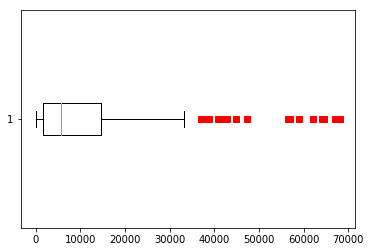

Summe: 2.924.068
Mean:     10.518


2018: 2.924.068 ┬  +613.028 (+27%)
2017: 2.311.040 ┘      


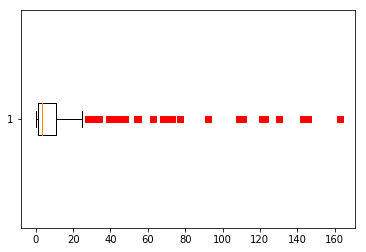

Summe 2018 :     3.631
Mean 2018 :         13


2018:     3.631 ┬    -1.492 (-29%)
2017:     5.123 ┘      


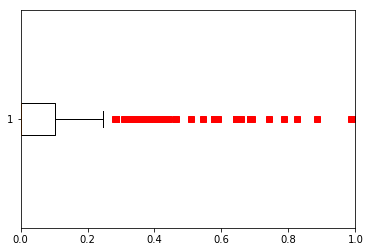

Mean 2018:  22% ┬   2% (+12%)
Mean 2017:  20% ┘      


Autor*in haben mehr als 12 Bearbeitungen im betrachteten Zeitraum 

2018:        35 ┬        +5 (+17%)
2017:        30 ┘      


Autor*in haben mehr als 120 Bearbeitungen im betrachteten Zeitraum

2018:         8 ┬        +3 (+60%)
2017:         5 ┘      


2018:    58.990 ┬    +1.073 ( +2%)
2017:    57.917 ┘      


2018:         4 ┬        -1 (-20%)
2017:         5 ┘      


Wikipedia-Artikel: Serlo
Views 2018:      2.861 ┬        -6 ( -0%)
Views 2017:      2.867 ┘      

MFNF / Wikipedia – 2018: 2062%
MFNF / Wikipedia – 2017: 2020%


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

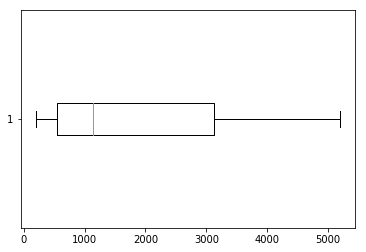

Summe:    10.226
Mean:      2.045


2018:    10.226 ┬      +562 ( +6%)
2017:     9.664 ┘      


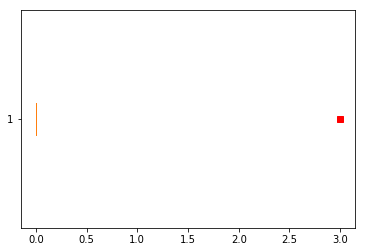

Summe 2018 :         3
Mean 2018 :          0


2018:         3 ┬       -16 (-84%)
2017:        19 ┘      


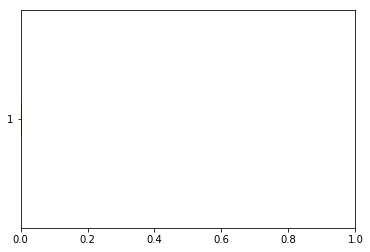

Mean 2018:   0% ┬   0%        
Mean 2017:   0% ┘      


Autor*in haben mehr als 12 Bearbeitungen im betrachteten Zeitraum 

2018:         0 ┬        -1 (-100%)
2017:         1 ┘      


Autor*in haben mehr als 120 Bearbeitungen im betrachteten Zeitraum

2018:         0 ┬        +0        
2017:         0 ┘      


2018:     3.134 ┬      -753 (-19%)
2017:     3.887 ┘      


2018:         0 ┬        -1 (-100%)
2017:         1 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     5.200 ┬    +1.525 (+41%)
2017:     3.675 ┘      


2018:         0 ┬        -7 (-100%)
2017:         7 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:       550 ┬       -26 ( -5%)
2017:       576 ┘      


2018:         3 ┬        -4 (-57%)
2017:         7 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     1.145 ┬       -80 ( -7%)
2017:     1.225 ┘      


2018:         0 ┬        -1 (-100%)
2017:         1 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:       197 ┬      -104 (-35%)
2017:       301 ┘      


2018:         0 ┬        -3 (-100%)
2017:         3 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

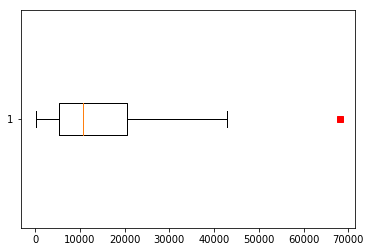

Summe:   902.822
Mean:     15.047


2018:   902.822 ┬   +39.966 ( +5%)
2017:   862.856 ┘      


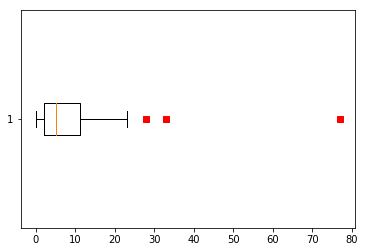

Summe 2018 :       504
Mean 2018 :          8


2018:       504 ┬      +368 (+271%)
2017:       136 ┘      


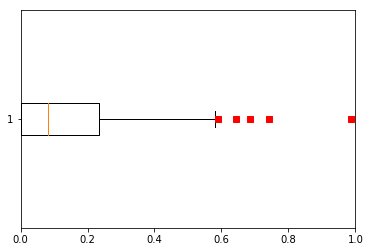

Mean 2018:  26% ┬  -0% ( -2%)
Mean 2017:  26% ┘      


Autor*in haben mehr als 12 Bearbeitungen im betrachteten Zeitraum 

2018:         3 ┬        +2 (+200%)
2017:         1 ┘      


Autor*in haben mehr als 120 Bearbeitungen im betrachteten Zeitraum

2018:         1 ┬        +1        
2017:         0 ┘      


2018:    38.722 ┬    -6.876 (-15%)
2017:    45.598 ┘      


2018:         0 ┬        +0        
2017:         0 ┘      


Wikipedia-Artikel: Grundlagen der Mathematik
Views 2018:      6.540 ┬      -442 ( -6%)
Views 2017:      6.982 ┘      

MFNF / Wikipedia – 2018: 592%
MFNF / Wikipedia – 2017: 653%


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     5.635 ┬      +309 ( +6%)
2017:     5.326 ┘      


2018:         7 ┬        +4 (+133%)
2017:         3 ┘      


Wikipedia-Artikel: Mathematik
Views 2018:    192.709 ┬   -23.364 (-11%)
Views 2017:    216.073 ┘      

MFNF / Wikipedia – 2018:   3%
MFNF / Wikipedia – 2017:   2%


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:    10.806 ┬    -1.828 (-14%)
2017:    12.634 ┘      


2018:         5 ┬        +1 (+25%)
2017:         4 ┘      


Wikipedia-Artikel: Aussagenlogik
Views 2018:    107.123 ┬    -7.626 ( -7%)
Views 2017:    114.749 ┘      

MFNF / Wikipedia – 2018:  10%
MFNF / Wikipedia – 2017:  11%


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:    16.837 ┬    -1.486 ( -8%)
2017:    18.323 ┘      


2018:         4 ┬        +1 (+33%)
2017:         3 ┘      


Wikipedia-Artikel: Junktor
Views 2018:     26.167 ┬      +207 ( +1%)
Views 2017:     25.960 ┘      

MFNF / Wikipedia – 2018:  64%
MFNF / Wikipedia – 2017:  71%


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:    10.803 ┬    -1.818 (-14%)
2017:    12.621 ┘      


2018:        10 ┬       +10        
2017:         0 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:    18.107 ┬    +2.368 (+15%)
2017:    15.739 ┘      


2018:        12 ┬       +12        
2017:         0 ┘      


Wikipedia-Artikel: Wahrheitstabelle
Views 2018:     57.386 ┬    -1.705 ( -3%)
Views 2017:     59.091 ┘      

MFNF / Wikipedia – 2018:  32%
MFNF / Wikipedia – 2017:  27%


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:    11.948 ┬    +1.109 (+10%)
2017:    10.839 ┘      


2018:        18 ┬       +17 (+1700%)
2017:         1 ┘      


Wikipedia-Artikel: Tautologie (Logik)
Views 2018:     90.678 ┬    +1.717 ( +2%)
Views 2017:     88.961 ┘      

MFNF / Wikipedia – 2018:  13%
MFNF / Wikipedia – 2017:  12%


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:    27.349 ┬    +2.082 ( +8%)
2017:    25.267 ┘      


2018:        18 ┬       +16 (+800%)
2017:         2 ┘      


Wikipedia-Artikel: Quantor
Views 2018:     47.276 ┬    -1.725 ( -4%)
Views 2017:     49.001 ┘      

MFNF / Wikipedia – 2018:  58%
MFNF / Wikipedia – 2017:  52%


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     3.382 ┬      +338 (+11%)
2017:     3.044 ┘      


2018:        13 ┬       +12 (+1200%)
2017:         1 ┘      


Wikipedia-Artikel: Aussageform
Views 2018:      3.422 ┬      -391 (-10%)
Views 2017:      3.813 ┘      

MFNF / Wikipedia – 2018:  99%
MFNF / Wikipedia – 2017:  80%


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:       229 ┬      +229        
2017:         0 ┘      


2018:         1 ┬        +1        
2017:         0 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     7.116 ┬    +1.346 (+23%)
2017:     5.770 ┘      


2018:        11 ┬        +8 (+267%)
2017:         3 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:    42.836 ┬    +3.763 (+10%)
2017:    39.073 ┘      


2018:         3 ┬        -4 (-57%)
2017:         7 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:       140 ┬      +140        
2017:         0 ┘      


2018:         1 ┬        +1        
2017:         0 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:    19.269 ┬   +10.346 (+116%)
2017:     8.923 ┘      


2018:         8 ┬        +8        
2017:         0 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     3.776 ┬      +552 (+17%)
2017:     3.224 ┘      


2018:         2 ┬       -11 (-85%)
2017:        13 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     8.354 ┬    -1.536 (-16%)
2017:     9.890 ┘      


2018:         3 ┬        +3        
2017:         0 ┘      


Wikipedia-Artikel: Beweis (Mathematik)
Views 2018:     36.692 ┬      -766 ( -2%)
Views 2017:     37.458 ┘      

MFNF / Wikipedia – 2018:  23%
MFNF / Wikipedia – 2017:  26%


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:    23.319 ┬    -2.130 ( -8%)
2017:    25.449 ┘      


2018:         1 ┬        +1        
2017:         0 ┘      


Wikipedia-Artikel: Reductio ad absurdum
Views 2018:     31.435 ┬      +194 ( +1%)
Views 2017:     31.241 ┘      

MFNF / Wikipedia – 2018:  74%
MFNF / Wikipedia – 2017:  81%


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     8.083 ┬    -1.809 (-18%)
2017:     9.892 ┘      


2018:         2 ┬        +0 ( +0%)
2017:         2 ┘      


Wikipedia-Artikel: Kontraposition
Views 2018:     13.698 ┬      +308 ( +2%)
Views 2017:     13.390 ┘      

MFNF / Wikipedia – 2018:  59%
MFNF / Wikipedia – 2017:  74%


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     6.556 ┬      -495 ( -7%)
2017:     7.051 ┘      


2018:         6 ┬        +5 (+500%)
2017:         1 ┘      


Wikipedia-Artikel: Notwendige und hinreichende Bedingung
Views 2018:     84.083 ┬      +962 ( +1%)
Views 2017:     83.121 ┘      

MFNF / Wikipedia – 2018:   8%
MFNF / Wikipedia – 2017:   8%


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:    68.188 ┬    -5.440 ( -7%)
2017:    73.628 ┘      


2018:         2 ┬        +0 ( +0%)
2017:         2 ┘      


Wikipedia-Artikel: Vollständige Induktion
Views 2018:     99.586 ┬   -20.803 (-17%)
Views 2017:    120.389 ┘      

MFNF / Wikipedia – 2018:  68%
MFNF / Wikipedia – 2017:  61%


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:    37.122 ┬    +3.736 (+11%)
2017:    33.386 ┘      


2018:         2 ┬        -8 (-80%)
2017:        10 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     9.978 ┬    -1.398 (-12%)
2017:    11.376 ┘      


2018:         8 ┬        +4 (+100%)
2017:         4 ┘      


Wikipedia-Artikel: Mengenlehre
Views 2018:    141.353 ┬    -8.399 ( -6%)
Views 2017:    149.752 ┘      

MFNF / Wikipedia – 2018:   7%
MFNF / Wikipedia – 2017:   8%


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:    20.313 ┬    +6.310 (+45%)
2017:    14.003 ┘      


2018:        13 ┬       +13        
2017:         0 ┘      


Wikipedia-Artikel: Menge (Mathematik)
Views 2018:    120.247 ┬    -8.162 ( -6%)
Views 2017:    128.409 ┘      

MFNF / Wikipedia – 2018:  17%
MFNF / Wikipedia – 2017:  11%


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     4.587 ┬      -265 ( -5%)
2017:     4.852 ┘      


2018:         2 ┬        +1 (+100%)
2017:         1 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:    27.987 ┬    +4.085 (+17%)
2017:    23.902 ┘      


2018:         8 ┬        +6 (+300%)
2017:         2 ┘      


Wikipedia-Artikel: Teilmenge
Views 2018:     77.644 ┬    -3.136 ( -4%)
Views 2017:     80.780 ┘      

MFNF / Wikipedia – 2018:  36%
MFNF / Wikipedia – 2017:  30%


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     8.970 ┬      -363 ( -4%)
2017:     9.333 ┘      


2018:         6 ┬        +6        
2017:         0 ┘      


Wikipedia-Artikel: Potenzmenge
Views 2018:     62.959 ┬      +610 ( +1%)
Views 2017:     62.349 ┘      

MFNF / Wikipedia – 2018:  14%
MFNF / Wikipedia – 2017:  15%


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:    10.037 ┬    +2.727 (+37%)
2017:     7.310 ┘      


2018:        12 ┬        +6 (+100%)
2017:         6 ┘      


Wikipedia-Artikel: Leere Menge
Views 2018:     42.781 ┬    -1.258 ( -3%)
Views 2017:     44.039 ┘      

MFNF / Wikipedia – 2018:  23%
MFNF / Wikipedia – 2017:  17%


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:    15.790 ┬      -557 ( -3%)
2017:    16.347 ┘      


2018:         4 ┬        +2 (+100%)
2017:         2 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:    12.613 ┬    +3.021 (+31%)
2017:     9.592 ┘      


2018:        28 ┬       +28        
2017:         0 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:    10.313 ┬    +4.076 (+65%)
2017:     6.237 ┘      


2018:        19 ┬       +18 (+1800%)
2017:         1 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     4.516 ┬      +818 (+22%)
2017:     3.698 ┘      


2018:        23 ┬       +23        
2017:         0 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:       603 ┬      +603        
2017:         0 ┘      


2018:         7 ┬        +7        
2017:         0 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:    10.943 ┬    -1.253 (-10%)
2017:    12.196 ┘      


2018:         7 ┬        +7        
2017:         0 ┘      


Wikipedia-Artikel: Disjunkt
Views 2018:     46.201 ┬    -4.679 ( -9%)
Views 2017:     50.880 ┘      

MFNF / Wikipedia – 2018:  24%
MFNF / Wikipedia – 2017:  24%


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     5.450 ┬      +134 ( +3%)
2017:     5.316 ┘      


2018:         9 ┬        +9        
2017:         0 ┘      


Wikipedia-Artikel: Tupel
Views 2018:     64.523 ┬    +2.569 ( +4%)
Views 2017:     61.954 ┘      

MFNF / Wikipedia – 2018:   8%
MFNF / Wikipedia – 2017:   9%


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     9.609 ┬    -1.524 (-14%)
2017:    11.133 ┘      


2018:         2 ┬        +0 ( +0%)
2017:         2 ┘      


Wikipedia-Artikel: Kartesisches Produkt
Views 2018:     75.691 ┬    +1.727 ( +2%)
Views 2017:     73.964 ┘      

MFNF / Wikipedia – 2018:  13%
MFNF / Wikipedia – 2017:  15%


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     2.572 ┬      +418 (+19%)
2017:     2.154 ┘      


2018:         7 ┬        +7        
2017:         0 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     2.905 ┬      +461 (+19%)
2017:     2.444 ┘      


2018:        22 ┬       +19 (+633%)
2017:         3 ┘      


Wikipedia-Artikel: Russellsche Antinomie
Views 2018:     28.568 ┬      +451 ( +2%)
Views 2017:     28.117 ┘      

MFNF / Wikipedia – 2018:  10%
MFNF / Wikipedia – 2017:   9%


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     1.362 ┬    +1.362        
2017:         0 ┘      


2018:        77 ┬       +77        
2017:         0 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:    10.950 ┬      +532 ( +5%)
2017:    10.418 ┘      


2018:         1 ┬        -2 (-67%)
2017:         3 ┘      


Wikipedia-Artikel: Relation (Mathematik)
Views 2018:     72.503 ┬    +1.163 ( +2%)
Views 2017:     71.340 ┘      

MFNF / Wikipedia – 2018:  15%
MFNF / Wikipedia – 2017:  15%


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     9.341 ┬    +1.854 (+25%)
2017:     7.487 ┘      


2018:         5 ┬        +0 ( +0%)
2017:         5 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:    12.278 ┬    +4.248 (+53%)
2017:     8.030 ┘      


2018:         2 ┬        -2 (-50%)
2017:         4 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:    31.298 ┬    +4.288 (+16%)
2017:    27.010 ┘      


2018:         1 ┬        -6 (-86%)
2017:         7 ┘      


Wikipedia-Artikel: Äquivalenzrelation
Views 2018:     85.772 ┬    -1.805 ( -2%)
Views 2017:     87.577 ┘      

MFNF / Wikipedia – 2018:  36%
MFNF / Wikipedia – 2017:  31%


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:    19.535 ┬    +1.623 ( +9%)
2017:    17.912 ┘      


2018:        16 ┬       +15 (+1500%)
2017:         1 ┘      


Wikipedia-Artikel: Ordnungsrelation
Views 2018:     68.577 ┬      +178 ( +0%)
Views 2017:     68.399 ┘      

MFNF / Wikipedia – 2018:  28%
MFNF / Wikipedia – 2017:  26%


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:    42.086 ┬    +2.866 ( +7%)
2017:    39.220 ┘      


2018:        33 ┬       +22 (+200%)
2017:        11 ┘      


Wikipedia-Artikel: Funktion (Mathematik)
Views 2018:    171.044 ┬    +1.167 ( +1%)
Views 2017:    169.877 ┘      

MFNF / Wikipedia – 2018:  25%
MFNF / Wikipedia – 2017:  23%


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     8.760 ┬    +1.176 (+16%)
2017:     7.584 ┘      


2018:         2 ┬        -1 (-33%)
2017:         3 ┘      


Wikipedia-Artikel: Verknüpfung (Mathematik)
Views 2018:     15.093 ┬      -321 ( -2%)
Views 2017:     15.414 ┘      

MFNF / Wikipedia – 2018:  58%
MFNF / Wikipedia – 2017:  49%


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:    16.505 ┬    -1.128 ( -6%)
2017:    17.633 ┘      


2018:        23 ┬       +18 (+360%)
2017:         5 ┘      


Wikipedia-Artikel: Mächtigkeit (Mathematik)
Views 2018:     58.693 ┬    +1.627 ( +3%)
Views 2017:     57.066 ┘      

MFNF / Wikipedia – 2018:  28%
MFNF / Wikipedia – 2017:  31%


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     4.935 ┬      -456 ( -8%)
2017:     5.391 ┘      


2018:         1 ┬        +1        
2017:         0 ┘      


Wikipedia-Artikel: Gleichung
Views 2018:     49.191 ┬    -8.272 (-14%)
Views 2017:     57.463 ┘      

MFNF / Wikipedia – 2018:  10%
MFNF / Wikipedia – 2017:   9%


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     1.875 ┬      -424 (-18%)
2017:     2.299 ┘      


2018:         0 ┬        +0        
2017:         0 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:       818 ┬       -34 ( -4%)
2017:       852 ┘      


2018:         0 ┬        -6 (-100%)
2017:         6 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:    26.602 ┬    -5.779 (-18%)
2017:    32.381 ┘      


2018:         3 ┬        -2 (-40%)
2017:         5 ┘      


Wikipedia-Artikel: Summe
Views 2018:    135.864 ┬    +4.606 ( +4%)
Views 2017:    131.258 ┘      

MFNF / Wikipedia – 2018:  20%
MFNF / Wikipedia – 2017:  25%


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:    21.419 ┬    +1.512 ( +8%)
2017:    19.907 ┘      


2018:         3 ┬        +3        
2017:         0 ┘      


Wikipedia-Artikel: Gaußsche Summenformel
Views 2018:    171.589 ┬   -11.878 ( -6%)
Views 2017:    183.467 ┘      

MFNF / Wikipedia – 2018:  12%
MFNF / Wikipedia – 2017:  11%


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:    40.826 ┬    +1.339 ( +3%)
2017:    39.487 ┘      


2018:         8 ┬        -1 (-11%)
2017:         9 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     2.312 ┬      +469 (+25%)
2017:     1.843 ┘      


2018:         0 ┬        +0        
2017:         0 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:    29.430 ┬    +4.561 (+18%)
2017:    24.869 ┘      


2018:        13 ┬       +11 (+550%)
2017:         2 ┘      


Wikipedia-Artikel: Fakultät (Mathematik)
Views 2018:    232.901 ┬    -4.516 ( -2%)
Views 2017:    237.417 ┘      

MFNF / Wikipedia – 2018:  13%
MFNF / Wikipedia – 2017:  10%


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:    21.026 ┬    -6.110 (-23%)
2017:    27.136 ┘      


2018:         2 ┬        +2        
2017:         0 ┘      


Wikipedia-Artikel: Binomialkoeffizient
Views 2018:    280.823 ┬   -21.534 ( -7%)
Views 2017:    302.357 ┘      

MFNF / Wikipedia – 2018:   7%
MFNF / Wikipedia – 2017:   9%


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:    17.386 ┬      +691 ( +4%)
2017:    16.695 ┘      


2018:         0 ┬        +0        
2017:         0 ┘      


Wikipedia-Artikel: Binomischer Lehrsatz
Views 2018:     88.870 ┬    +3.201 ( +4%)
Views 2017:     85.669 ┘      

MFNF / Wikipedia – 2018:  20%
MFNF / Wikipedia – 2017:  19%


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:    37.298 ┬    +6.836 (+22%)
2017:    30.462 ┘      


2018:         5 ┬        +5        
2017:         0 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     5.492 ┬      +420 ( +8%)
2017:     5.072 ┘      


2018:         3 ┬        +3        
2017:         0 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:    12.157 ┬      -409 ( -3%)
2017:    12.566 ┘      


2018:         0 ┬        +0        
2017:         0 ┘      


Wikipedia-Artikel: Liste mathematischer Symbole
Views 2018:    718.297 ┬    +5.442 ( +1%)
Views 2017:    712.855 ┘      

MFNF / Wikipedia – 2018:   2%
MFNF / Wikipedia – 2017:   2%


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     3.368 ┬      +336 (+11%)
2017:     3.032 ┘      


2018:         0 ┬        -2 (-100%)
2017:         2 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

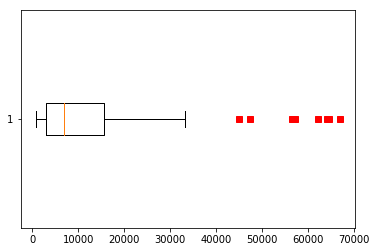

Summe: 1.578.581
Mean:     12.429


2018: 1.578.581 ┬  +404.875 (+34%)
2017: 1.173.706 ┘      


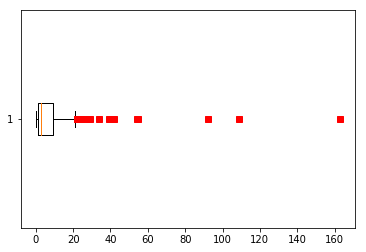

Summe 2018 :     1.231
Mean 2018 :          9


2018:     1.231 ┬    -2.369 (-66%)
2017:     3.600 ┘      


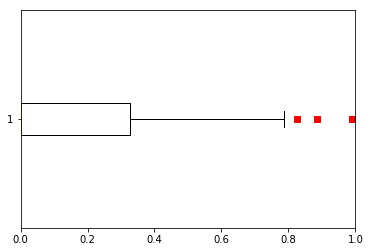

Mean 2018:  20% ┬   5% (+33%)
Mean 2017:  15% ┘      


Autor*in haben mehr als 12 Bearbeitungen im betrachteten Zeitraum 

2018:        15 ┬       -11 (-42%)
2017:        26 ┘      


Autor*in haben mehr als 120 Bearbeitungen im betrachteten Zeitraum

2018:         3 ┬        -1 (-25%)
2017:         4 ┘      


2018:    64.570 ┬    -2.942 ( -4%)
2017:    67.512 ┘      


2018:         0 ┬        +0        
2017:         0 ┘      


Wikipedia-Artikel: Analysis
Views 2018:     82.114 ┬    +3.779 ( +5%)
Views 2017:     78.335 ┘      

MFNF / Wikipedia – 2018:  79%
MFNF / Wikipedia – 2017:  86%


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     7.788 ┬      -566 ( -7%)
2017:     8.354 ┘      


2018:         2 ┬        -4 (-67%)
2017:         6 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     2.547 ┬      -182 ( -7%)
2017:     2.729 ┘      


2018:         0 ┬        +0        
2017:         0 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     7.168 ┬    +1.836 (+34%)
2017:     5.332 ┘      


2018:         3 ┬       -18 (-86%)
2017:        21 ┘      


Wikipedia-Artikel: Reelle Zahl
Views 2018:    245.280 ┬   -10.047 ( -4%)
Views 2017:    255.327 ┘      

MFNF / Wikipedia – 2018:   3%
MFNF / Wikipedia – 2017:   2%


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     2.700 ┬      -223 ( -8%)
2017:     2.923 ┘      


2018:         1 ┬        +1        
2017:         0 ┘      


Wikipedia-Artikel: Zahlengerade
Views 2018:      8.080 ┬      -675 ( -8%)
Views 2017:      8.755 ┘      

MFNF / Wikipedia – 2018:  33%
MFNF / Wikipedia – 2017:  33%


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:    16.909 ┬      -359 ( -2%)
2017:    17.268 ┘      


2018:         2 ┬       -10 (-83%)
2017:        12 ┘      


Wikipedia-Artikel: Körper (Algebra)
Views 2018:     84.774 ┬    +1.809 ( +2%)
Views 2017:     82.965 ┘      

MFNF / Wikipedia – 2018:  20%
MFNF / Wikipedia – 2017:  21%


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:    14.077 ┬    +2.221 (+19%)
2017:    11.856 ┘      


2018:        29 ┬       +13 (+81%)
2017:        16 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     4.025 ┬    +1.595 (+66%)
2017:     2.430 ┘      


2018:         6 ┬       -29 (-83%)
2017:        35 ┘      


Wikipedia-Artikel: Potenz (Mathematik)
Views 2018:    203.505 ┬    -8.728 ( -4%)
Views 2017:    212.233 ┘      

MFNF / Wikipedia – 2018:   2%
MFNF / Wikipedia – 2017:   1%


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     6.418 ┬      +184 ( +3%)
2017:     6.234 ┘      


2018:         1 ┬        -6 (-86%)
2017:         7 ┘      


Wikipedia-Artikel: Geordneter Körper
Views 2018:     11.089 ┬      +201 ( +2%)
Views 2017:     10.888 ┘      

MFNF / Wikipedia – 2018:  58%
MFNF / Wikipedia – 2017:  57%


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     5.350 ┬      +768 (+17%)
2017:     4.582 ┘      


2018:         0 ┬       -39 (-100%)
2017:        39 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:    22.991 ┬    +3.918 (+21%)
2017:    19.073 ┘      


2018:         8 ┬       -23 (-74%)
2017:        31 ┘      


Wikipedia-Artikel: Betragsfunktion
Views 2018:     74.696 ┬      -832 ( -1%)
Views 2017:     75.528 ┘      

MFNF / Wikipedia – 2018:  31%
MFNF / Wikipedia – 2017:  25%


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:    10.609 ┬    -1.220 (-10%)
2017:    11.829 ┘      


2018:         0 ┬        -5 (-100%)
2017:         5 ┘      


Wikipedia-Artikel: Intervall (Mathematik)
Views 2018:     93.165 ┬    -7.722 ( -8%)
Views 2017:    100.887 ┘      

MFNF / Wikipedia – 2018:  11%
MFNF / Wikipedia – 2017:  12%


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     3.700 ┬    -1.231 (-25%)
2017:     4.931 ┘      


2018:         0 ┬        -9 (-100%)
2017:         9 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     6.988 ┬      +499 ( +8%)
2017:     6.489 ┘      


2018:         1 ┬        -4 (-80%)
2017:         5 ┘      


Wikipedia-Artikel: Archimedisches Axiom
Views 2018:     16.775 ┬    -1.287 ( -7%)
Views 2017:     18.062 ┘      

MFNF / Wikipedia – 2018:  42%
MFNF / Wikipedia – 2017:  36%


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:    14.517 ┬       +83 ( +1%)
2017:    14.434 ┘      


2018:         0 ┬       -13 (-100%)
2017:        13 ┘      


Wikipedia-Artikel: Bernoullische Ungleichung
Views 2018:     32.975 ┬    -3.100 ( -9%)
Views 2017:     36.075 ┘      

MFNF / Wikipedia – 2018:  44%
MFNF / Wikipedia – 2017:  40%


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     5.488 ┬    -1.797 (-25%)
2017:     7.285 ┘      


2018:         4 ┬        +2 (+100%)
2017:         2 ┘      


Wikipedia-Artikel: Intervallschachtelung
Views 2018:     12.931 ┬    -2.163 (-14%)
Views 2017:     15.094 ┘      

MFNF / Wikipedia – 2018:  42%
MFNF / Wikipedia – 2017:  48%


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     3.544 ┬    +2.071 (+141%)
2017:     1.473 ┘      


2018:        55 ┬       +47 (+588%)
2017:         8 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     2.575 ┬    +1.932 (+300%)
2017:       643 ┘      


2018:       109 ┬      +107 (+5350%)
2017:         2 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     6.466 ┬    +4.765 (+280%)
2017:     1.701 ┘      


2018:       163 ┬      +137 (+527%)
2017:        26 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     5.692 ┬    +5.514 (+3098%)
2017:       178 ┘      


2018:        92 ┬       +91 (+9100%)
2017:         1 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     7.341 ┬    +4.126 (+128%)
2017:     3.215 ┘      


2018:         1 ┬      -136 (-99%)
2017:       137 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     2.235 ┬    +1.606 (+255%)
2017:       629 ┘      


2018:        39 ┬       +33 (+550%)
2017:         6 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:    23.203 ┬    +1.135 ( +5%)
2017:    22.068 ┘      


2018:         0 ┬       -34 (-100%)
2017:        34 ┘      


Wikipedia-Artikel: Infimum und Supremum
Views 2018:     65.823 ┬    +3.310 ( +5%)
Views 2017:     62.513 ┘      

MFNF / Wikipedia – 2018:  35%
MFNF / Wikipedia – 2017:  35%


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     3.135 ┬      +430 (+16%)
2017:     2.705 ┘      


2018:         1 ┬        -7 (-88%)
2017:         8 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:    28.287 ┬      +242 ( +1%)
2017:    28.045 ┘      


2018:        19 ┬        -7 (-27%)
2017:        26 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:    14.040 ┬    +3.450 (+33%)
2017:    10.590 ┘      


2018:         5 ┬       -39 (-89%)
2017:        44 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     4.824 ┬    +1.595 (+49%)
2017:     3.229 ┘      


2018:         0 ┬       -18 (-100%)
2017:        18 ┘      


Wikipedia-Artikel: Wurzel (Mathematik)
Views 2018:    125.737 ┬   -21.648 (-15%)
Views 2017:    147.385 ┘      

MFNF / Wikipedia – 2018:   4%
MFNF / Wikipedia – 2017:   2%


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     1.198 ┬       -55 ( -4%)
2017:     1.253 ┘      


2018:         0 ┬        -8 (-100%)
2017:         8 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     2.168 ┬      +874 (+68%)
2017:     1.294 ┘      


2018:         4 ┬        +0 ( +0%)
2017:         4 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     1.808 ┬      +717 (+66%)
2017:     1.091 ┘      


2018:         0 ┬        -1 (-100%)
2017:         1 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:       816 ┬      +146 (+22%)
2017:       670 ┘      


2018:         3 ┬        +1 (+50%)
2017:         2 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:    10.994 ┬    -1.131 ( -9%)
2017:    12.125 ┘      


2018:         3 ┬       -58 (-95%)
2017:        61 ┘      


Wikipedia-Artikel: Folge (Mathematik)
Views 2018:     67.360 ┬    -3.691 ( -5%)
Views 2017:     71.051 ┘      

MFNF / Wikipedia – 2018:  16%
MFNF / Wikipedia – 2017:  17%


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:    30.439 ┬      -199 ( -1%)
2017:    30.638 ┘      


2018:         2 ┬       -49 (-96%)
2017:        51 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:    15.534 ┬    +2.362 (+18%)
2017:    13.172 ┘      


2018:        19 ┬       -49 (-72%)
2017:        68 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     2.228 ┬      +204 (+10%)
2017:     2.024 ┘      


2018:         2 ┬        -5 (-71%)
2017:         7 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:    62.127 ┬    +3.222 ( +5%)
2017:    58.905 ┘      


2018:         7 ┬       -76 (-92%)
2017:        83 ┘      


Wikipedia-Artikel: Grenzwert (Folge)
Views 2018:     94.573 ┬   -15.832 (-14%)
Views 2017:    110.405 ┘      

MFNF / Wikipedia – 2018:  66%
MFNF / Wikipedia – 2017:  53%


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:    64.112 ┬   +10.796 (+20%)
2017:    53.316 ┘      


2018:        14 ┬       -27 (-66%)
2017:        41 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:    56.396 ┬   +10.931 (+24%)
2017:    45.465 ┘      


2018:         2 ┬       -44 (-96%)
2017:        46 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     6.592 ┬      +601 (+10%)
2017:     5.991 ┘      


2018:         1 ┬       -20 (-95%)
2017:        21 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:    47.329 ┬   +10.825 (+30%)
2017:    36.504 ┘      


2018:         7 ┬       -61 (-90%)
2017:        68 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:    12.724 ┬    +1.750 (+16%)
2017:    10.974 ┘      


2018:         4 ┬       -37 (-90%)
2017:        41 ┘      


Wikipedia-Artikel: Einschnürungssatz
Views 2018:      9.642 ┬    -1.395 (-13%)
Views 2017:     11.037 ┘      

MFNF / Wikipedia – 2018: 132%
MFNF / Wikipedia – 2017:  99%


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:    12.369 ┬    +4.066 (+49%)
2017:     8.303 ┘      


2018:         2 ┬        +0 ( +0%)
2017:         2 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:    26.085 ┬    +2.449 (+10%)
2017:    23.636 ┘      


2018:        10 ┬        -9 (-47%)
2017:        19 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:    18.513 ┬   +10.268 (+125%)
2017:     8.245 ┘      


2018:         7 ┬        -6 (-46%)
2017:        13 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:    12.073 ┬      +418 ( +4%)
2017:    11.655 ┘      


2018:         9 ┬       -13 (-59%)
2017:        22 ┘      


Wikipedia-Artikel: Teilfolge
Views 2018:      8.616 ┬        +0 ( +0%)
Views 2017:      8.616 ┘      

MFNF / Wikipedia – 2018: 140%
MFNF / Wikipedia – 2017: 135%


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:    19.339 ┬    -1.616 ( -8%)
2017:    20.955 ┘      


2018:         0 ┬       -42 (-100%)
2017:        42 ┘      


Wikipedia-Artikel: Häufungspunkt
Views 2018:     28.279 ┬      -830 ( -3%)
Views 2017:     29.109 ┘      

MFNF / Wikipedia – 2018:  68%
MFNF / Wikipedia – 2017:  72%


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     6.606 ┬      -299 ( -4%)
2017:     6.905 ┘      


2018:         1 ┬        -9 (-90%)
2017:        10 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     8.994 ┬      +575 ( +7%)
2017:     8.419 ┘      


2018:         7 ┬       -12 (-63%)
2017:        19 ┘      


Wikipedia-Artikel: Satz von Bolzano-Weierstraß
Views 2018:     24.430 ┬      +283 ( +1%)
Views 2017:     24.147 ┘      

MFNF / Wikipedia – 2018:  37%
MFNF / Wikipedia – 2017:  35%


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:    10.398 ┬    +3.168 (+44%)
2017:     7.230 ┘      


2018:         5 ┬       -11 (-69%)
2017:        16 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     1.944 ┬      +757 (+64%)
2017:     1.187 ┘      


2018:         3 ┬        -1 (-25%)
2017:         4 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:    24.039 ┬    +2.562 (+12%)
2017:    21.477 ┘      


2018:        14 ┬       -56 (-80%)
2017:        70 ┘      


Wikipedia-Artikel: Limes superior und Limes inferior
Views 2018:     34.843 ┬      -156 ( -0%)
Views 2017:     34.999 ┘      

MFNF / Wikipedia – 2018:  69%
MFNF / Wikipedia – 2017:  61%


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:    25.434 ┬    +2.857 (+13%)
2017:    22.577 ┘      


2018:         7 ┬       -15 (-68%)
2017:        22 ┘      


Wikipedia-Artikel: Cauchy-Folge
Views 2018:     39.495 ┬    +2.077 ( +6%)
Views 2017:     37.418 ┘      

MFNF / Wikipedia – 2018:  64%
MFNF / Wikipedia – 2017:  60%


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     3.312 ┬    +1.331 (+67%)
2017:     1.981 ┘      


2018:        11 ┬        -2 (-15%)
2017:        13 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:    25.564 ┬    +9.329 (+57%)
2017:    16.235 ┘      


2018:        19 ┬       -41 (-68%)
2017:        60 ┘      


Wikipedia-Artikel: Reihe (Mathematik)
Views 2018:     76.480 ┬    -7.953 ( -9%)
Views 2017:     84.433 ┘      

MFNF / Wikipedia – 2018:  33%
MFNF / Wikipedia – 2017:  19%


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:    13.282 ┬    +4.548 (+52%)
2017:     8.734 ┘      


2018:        21 ┬        -3 (-12%)
2017:        24 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:    15.727 ┬    +4.549 (+41%)
2017:    11.178 ┘      


2018:        25 ┬        -5 (-17%)
2017:        30 ┘      


Wikipedia-Artikel: Teleskopsumme
Views 2018:     17.747 ┬      +815 ( +5%)
Views 2017:     16.932 ┘      

MFNF / Wikipedia – 2018:  89%
MFNF / Wikipedia – 2017:  66%


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:    66.952 ┬   +12.034 (+22%)
2017:    54.918 ┘      


2018:        22 ┬        -9 (-29%)
2017:        31 ┘      


Wikipedia-Artikel: Geometrische Reihe
Views 2018:    234.314 ┬    -3.069 ( -1%)
Views 2017:    237.383 ┘      

MFNF / Wikipedia – 2018:  29%
MFNF / Wikipedia – 2017:  23%


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:    27.712 ┬   +10.058 (+57%)
2017:    17.654 ┘      


2018:        34 ┬       +13 (+62%)
2017:        21 ┘      


Wikipedia-Artikel: Harmonische Reihe
Views 2018:     86.718 ┬    +5.291 ( +6%)
Views 2017:     81.427 ┘      

MFNF / Wikipedia – 2018:  32%
MFNF / Wikipedia – 2017:  22%


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:    13.486 ┬    +8.650 (+179%)
2017:     4.836 ┘      


2018:         0 ┬        -6 (-100%)
2017:         6 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:    18.100 ┬    +6.210 (+52%)
2017:    11.890 ┘      


2018:         3 ┬       -17 (-85%)
2017:        20 ┘      


Wikipedia-Artikel: Absolut konvergente Reihe
Views 2018:     18.262 ┬    -1.537 ( -8%)
Views 2017:     19.799 ┘      

MFNF / Wikipedia – 2018:  99%
MFNF / Wikipedia – 2017:  60%


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     7.145 ┬    +2.796 (+64%)
2017:     4.349 ┘      


2018:        19 ┬       -29 (-60%)
2017:        48 ┘      


Wikipedia-Artikel: Umordnung von Reihen
Views 2018:      3.302 ┬      -457 (-12%)
Views 2017:      3.759 ┘      

MFNF / Wikipedia – 2018: 216%
MFNF / Wikipedia – 2017: 116%


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     3.890 ┬    +1.681 (+76%)
2017:     2.209 ┘      


2018:        11 ┬        +1 (+10%)
2017:        10 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:    57.058 ┬   +14.205 (+33%)
2017:    42.853 ┘      


2018:        11 ┬        -4 (-27%)
2017:        15 ┘      


Wikipedia-Artikel: Konvergenzkriterium
Views 2018:     31.886 ┬    -3.686 (-10%)
Views 2017:     35.572 ┘      

MFNF / Wikipedia – 2018: 179%
MFNF / Wikipedia – 2017: 120%


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:    12.133 ┬    +1.878 (+18%)
2017:    10.255 ┘      


2018:         2 ┬        -4 (-67%)
2017:         6 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     5.282 ┬    +1.877 (+55%)
2017:     3.405 ┘      


2018:         2 ┬        -3 (-60%)
2017:         5 ┘      


Wikipedia-Artikel: Nullfolgenkriterium
Views 2018:     13.101 ┬      +162 ( +1%)
Views 2017:     12.939 ┘      

MFNF / Wikipedia – 2018:  40%
MFNF / Wikipedia – 2017:  26%


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     6.602 ┬    +1.604 (+32%)
2017:     4.998 ┘      


2018:         0 ┬        -3 (-100%)
2017:         3 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:    25.936 ┬    +8.111 (+46%)
2017:    17.825 ┘      


2018:         5 ┬       -21 (-81%)
2017:        26 ┘      


Wikipedia-Artikel: Majorantenkriterium
Views 2018:     23.296 ┬    -2.586 (-10%)
Views 2017:     25.882 ┘      

MFNF / Wikipedia – 2018: 111%
MFNF / Wikipedia – 2017:  69%


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:    13.577 ┬    +3.049 (+29%)
2017:    10.528 ┘      


2018:         4 ┬       -16 (-80%)
2017:        20 ┘      


Wikipedia-Artikel: Wurzelkriterium
Views 2018:     29.387 ┬      +252 ( +1%)
Views 2017:     29.135 ┘      

MFNF / Wikipedia – 2018:  46%
MFNF / Wikipedia – 2017:  36%


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:    19.067 ┬    +5.334 (+39%)
2017:    13.733 ┘      


2018:        28 ┬        -3 (-10%)
2017:        31 ┘      


Wikipedia-Artikel: Quotientenkriterium
Views 2018:     43.329 ┬    -1.708 ( -4%)
Views 2017:     45.037 ┘      

MFNF / Wikipedia – 2018:  44%
MFNF / Wikipedia – 2017:  30%


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:    18.955 ┬    +6.880 (+57%)
2017:    12.075 ┘      


2018:         4 ┬       -26 (-87%)
2017:        30 ┘      


Wikipedia-Artikel: Leibniz-Kriterium
Views 2018:     37.337 ┬    -1.007 ( -3%)
Views 2017:     38.344 ┘      

MFNF / Wikipedia – 2018:  51%
MFNF / Wikipedia – 2017:  31%


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     5.288 ┬      +784 (+17%)
2017:     4.504 ┘      


2018:         3 ┬        -4 (-57%)
2017:         7 ┘      


Wikipedia-Artikel: Cauchysches Verdichtungskriterium
Views 2018:      9.694 ┬    -1.429 (-13%)
Views 2017:     11.123 ┘      

MFNF / Wikipedia – 2018:  55%
MFNF / Wikipedia – 2017:  40%


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:    15.220 ┬   +10.495 (+222%)
2017:     4.725 ┘      


2018:         1 ┬       -10 (-91%)
2017:        11 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:    17.602 ┬   +10.949 (+165%)
2017:     6.653 ┘      


2018:        22 ┬        +8 (+57%)
2017:        14 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     5.222 ┬    +2.114 (+68%)
2017:     3.108 ┘      


2018:         0 ┬       -49 (-100%)
2017:        49 ┘      


Wikipedia-Artikel: Exponentialfunktion
Views 2018:    320.563 ┬   -19.315 ( -6%)
Views 2017:    339.878 ┘      

MFNF / Wikipedia – 2018:   2%
MFNF / Wikipedia – 2017:   1%


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     6.319 ┬    +4.465 (+241%)
2017:     1.854 ┘      


2018:         0 ┬       -22 (-100%)
2017:        22 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     1.662 ┬      +903 (+119%)
2017:       759 ┘      


2018:         3 ┬        -8 (-73%)
2017:        11 ┘      


Wikipedia-Artikel: Logarithmus
Views 2018:    452.356 ┬   -63.472 (-12%)
Views 2017:    515.828 ┘      

MFNF / Wikipedia – 2018:   0%
MFNF / Wikipedia – 2017:   0%


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     1.192 ┬      +492 (+70%)
2017:       700 ┘      


2018:         0 ┬        -2 (-100%)
2017:         2 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:       832 ┬      +319 (+62%)
2017:       513 ┘      


2018:         0 ┬       -14 (-100%)
2017:        14 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:       761 ┬      +296 (+64%)
2017:       465 ┘      


2018:         0 ┬        -1 (-100%)
2017:         1 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     6.838 ┬    +4.387 (+179%)
2017:     2.451 ┘      


2018:         1 ┬       -53 (-98%)
2017:        54 ┘      


Wikipedia-Artikel: Sinus und Kosinus
Views 2018:    648.019 ┬   -57.320 ( -8%)
Views 2017:    705.339 ┘      

MFNF / Wikipedia – 2018:   1%
MFNF / Wikipedia – 2017:   0%


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     2.565 ┬    +1.639 (+177%)
2017:       926 ┘      


2018:         0 ┬       -46 (-100%)
2017:        46 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     7.195 ┬    +5.284 (+277%)
2017:     1.911 ┘      


2018:         1 ┬       -25 (-96%)
2017:        26 ┘      


Wikipedia-Artikel: Arkussinus und Arkuskosinus
Views 2018:    122.689 ┬    -8.057 ( -6%)
Views 2017:    130.746 ┘      

MFNF / Wikipedia – 2018:   6%
MFNF / Wikipedia – 2017:   1%


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:       782 ┬      +360 (+85%)
2017:       422 ┘      


2018:         0 ┬        -1 (-100%)
2017:         1 ┘      


Wikipedia-Artikel: Tangens und Kotangens
Views 2018:    323.059 ┬   -17.997 ( -5%)
Views 2017:    341.056 ┘      

MFNF / Wikipedia – 2018:   0%
MFNF / Wikipedia – 2017:   0%


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     7.195 ┬    +5.284 (+277%)
2017:     1.911 ┘      


2018:         1 ┬        -6 (-86%)
2017:         7 ┘      


Wikipedia-Artikel: Arkustangens und Arkuskotangens
Views 2018:    138.846 ┬   -14.940 (-10%)
Views 2017:    153.786 ┘      

MFNF / Wikipedia – 2018:   5%
MFNF / Wikipedia – 2017:   1%


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     1.331 ┬      +626 (+89%)
2017:       705 ┘      


2018:         8 ┬        +4 (+100%)
2017:         4 ┘      


Wikipedia-Artikel: Sinus hyperbolicus und Kosinus hyperbolicus
Views 2018:    137.285 ┬    -3.353 ( -2%)
Views 2017:    140.638 ┘      

MFNF / Wikipedia – 2018:   1%
MFNF / Wikipedia – 2017:   1%


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:       879 ┬      +346 (+65%)
2017:       533 ┘      


2018:         1 ┬        -8 (-89%)
2017:         9 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:    28.081 ┬    +9.346 (+50%)
2017:    18.735 ┘      


2018:         5 ┬       -68 (-93%)
2017:        73 ┘      


Wikipedia-Artikel: Stetigkeit
Views 2018:    114.252 ┬    -7.715 ( -6%)
Views 2017:    121.967 ┘      

MFNF / Wikipedia – 2018:  25%
MFNF / Wikipedia – 2017:  15%


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:    44.957 ┬   +14.854 (+49%)
2017:    30.103 ┘      


2018:         9 ┬       -70 (-89%)
2017:        79 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:    33.234 ┬   +11.906 (+56%)
2017:    21.328 ┘      


2018:        11 ┬       -98 (-90%)
2017:       109 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     6.400 ┬    +2.676 (+72%)
2017:     3.724 ┘      


2018:         1 ┬      -104 (-99%)
2017:       105 ┘      


Wikipedia-Artikel: Grenzwert (Funktion)
Views 2018:     91.493 ┬    +6.663 ( +8%)
Views 2017:     84.830 ┘      

MFNF / Wikipedia – 2018:   7%
MFNF / Wikipedia – 2017:   4%


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     9.128 ┬    +2.482 (+37%)
2017:     6.646 ┘      


2018:         4 ┬       -31 (-89%)
2017:        35 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:    26.812 ┬   +12.353 (+85%)
2017:    14.459 ┘      


2018:         4 ┬       -83 (-95%)
2017:        87 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     3.730 ┬    +1.870 (+101%)
2017:     1.860 ┘      


2018:         1 ┬       -36 (-97%)
2017:        37 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:    14.899 ┬    +4.876 (+49%)
2017:    10.023 ┘      


2018:         7 ┬       -40 (-85%)
2017:        47 ┘      


Wikipedia-Artikel: Zwischenwertsatz
Views 2018:     31.998 ┬      +408 ( +1%)
Views 2017:     31.590 ┘      

MFNF / Wikipedia – 2018:  47%
MFNF / Wikipedia – 2017:  32%


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:    11.782 ┬    +3.883 (+49%)
2017:     7.899 ┘      


2018:         5 ┬       -44 (-90%)
2017:        49 ┘      


Wikipedia-Artikel: Satz vom Minimum und Maximum
Views 2018:     14.272 ┬    +1.794 (+14%)
Views 2017:     12.478 ┘      

MFNF / Wikipedia – 2018:  83%
MFNF / Wikipedia – 2017:  63%


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     6.130 ┬    +2.299 (+60%)
2017:     3.831 ┘      


2018:         3 ┬       -23 (-88%)
2017:        26 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:    16.991 ┬    +7.092 (+72%)
2017:     9.899 ┘      


2018:         5 ┬       -66 (-93%)
2017:        71 ┘      


Wikipedia-Artikel: Gleichmäßige Stetigkeit
Views 2018:     26.356 ┬      -233 ( -1%)
Views 2017:     26.589 ┘      

MFNF / Wikipedia – 2018:  64%
MFNF / Wikipedia – 2017:  37%


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:    19.813 ┬   +13.574 (+218%)
2017:     6.239 ┘      


2018:        54 ┬       +19 (+54%)
2017:        35 ┘      


Wikipedia-Artikel: Lipschitz-Stetigkeit
Views 2018:     51.361 ┬      +326 ( +1%)
Views 2017:     51.035 ┘      

MFNF / Wikipedia – 2018:  39%
MFNF / Wikipedia – 2017:  12%


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     4.582 ┬    +1.369 (+43%)
2017:     3.213 ┘      


2018:         1 ┬       -15 (-94%)
2017:        16 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:    14.655 ┬    +7.226 (+97%)
2017:     7.429 ┘      


2018:         2 ┬      -123 (-98%)
2017:       125 ┘      


Wikipedia-Artikel: Differentialrechnung
Views 2018:    210.993 ┬   -16.781 ( -7%)
Views 2017:    227.774 ┘      

MFNF / Wikipedia – 2018:   7%
MFNF / Wikipedia – 2017:   3%


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     2.596 ┬      +415 (+19%)
2017:     2.181 ┘      


2018:         1 ┬       -35 (-97%)
2017:        36 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     1.182 ┬      +888 (+302%)
2017:       294 ┘      


2018:         1 ┬        -1 (-50%)
2017:         2 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     5.025 ┬    +1.870 (+59%)
2017:     3.155 ┘      


2018:         2 ┬       -20 (-91%)
2017:        22 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     1.519 ┬      +152 (+11%)
2017:     1.367 ┘      


2018:         2 ┬       -15 (-88%)
2017:        17 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     3.728 ┬    +1.988 (+114%)
2017:     1.740 ┘      


2018:         9 ┬        -7 (-44%)
2017:        16 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     6.059 ┬    +2.064 (+52%)
2017:     3.995 ┘      


2018:         7 ┬        -5 (-42%)
2017:        12 ┘      


Wikipedia-Artikel: Satz von Rolle
Views 2018:     17.116 ┬    +2.925 (+21%)
Views 2017:     14.191 ┘      

MFNF / Wikipedia – 2018:  35%
MFNF / Wikipedia – 2017:  28%


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:    19.038 ┬    +7.981 (+72%)
2017:    11.057 ┘      


2018:         5 ┬       -41 (-89%)
2017:        46 ┘      


Wikipedia-Artikel: Mittelwertsatz der Differentialrechnung
Views 2018:     56.798 ┬      -423 ( -1%)
Views 2017:     57.221 ┘      

MFNF / Wikipedia – 2018:  34%
MFNF / Wikipedia – 2017:  19%


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     1.875 ┬       -17 ( -1%)
2017:     1.892 ┘      


2018:         1 ┬       -19 (-95%)
2017:        20 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     4.686 ┬    +3.627 (+342%)
2017:     1.059 ┘      


2018:         1 ┬       -10 (-91%)
2017:        11 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     6.632 ┬    +3.425 (+107%)
2017:     3.207 ┘      


2018:         9 ┬       -29 (-76%)
2017:        38 ┘      


Wikipedia-Artikel: Extremwert
Views 2018:     55.451 ┬      -376 ( -1%)
Views 2017:     55.827 ┘      

MFNF / Wikipedia – 2018:  12%
MFNF / Wikipedia – 2017:   6%


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     8.608 ┬    +5.398 (+168%)
2017:     3.210 ┘      


2018:        16 ┬        +9 (+129%)
2017:         7 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     2.549 ┬    +1.901 (+293%)
2017:       648 ┘      


2018:         3 ┬        -6 (-67%)
2017:         9 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     1.965 ┬      +308 (+19%)
2017:     1.657 ┘      


2018:         2 ┬        -1 (-33%)
2017:         3 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:       998 ┬      +257 (+35%)
2017:       741 ┘      


2018:         5 ┬        +2 (+67%)
2017:         3 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:       909 ┬      +251 (+38%)
2017:       658 ┘      


2018:         2 ┬        -4 (-67%)
2017:         6 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:       945 ┬      +331 (+54%)
2017:       614 ┘      


2018:        14 ┬       +12 (+600%)
2017:         2 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     4.340 ┬    +1.173 (+37%)
2017:     3.167 ┘      


2018:         3 ┬       -20 (-87%)
2017:        23 ┘      


Wikipedia-Artikel: Integralrechnung
Views 2018:    202.605 ┬   -29.193 (-13%)
Views 2017:    231.798 ┘      

MFNF / Wikipedia – 2018:   2%
MFNF / Wikipedia – 2017:   1%


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     9.696 ┬    +5.223 (+117%)
2017:     4.473 ┘      


2018:         8 ┬       -54 (-87%)
2017:        62 ┘      


Wikipedia-Artikel: Riemannsches Integral
Views 2018:     50.652 ┬    -2.599 ( -5%)
Views 2017:     53.251 ┘      

MFNF / Wikipedia – 2018:  19%
MFNF / Wikipedia – 2017:   8%


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     2.420 ┬    +1.268 (+110%)
2017:     1.152 ┘      


2018:         0 ┬       -13 (-100%)
2017:        13 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     2.614 ┬      +991 (+61%)
2017:     1.623 ┘      


2018:         0 ┬       -19 (-100%)
2017:        19 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     7.433 ┬    +5.945 (+400%)
2017:     1.488 ┘      


2018:         0 ┬       -38 (-100%)
2017:        38 ┘      


Wikipedia-Artikel: Mittelwertsatz der Integralrechnung
Views 2018:     22.095 ┬    -2.507 (-10%)
Views 2017:     24.602 ┘      

MFNF / Wikipedia – 2018:  34%
MFNF / Wikipedia – 2017:   6%


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:    15.372 ┬    +8.136 (+112%)
2017:     7.236 ┘      


2018:         5 ┬      -100 (-95%)
2017:       105 ┘      


Wikipedia-Artikel: Fundamentalsatz der Analysis
Views 2018:     62.312 ┬   +23.114 (+59%)
Views 2017:     39.198 ┘      

MFNF / Wikipedia – 2018:  25%
MFNF / Wikipedia – 2017:  18%


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     7.255 ┬    +3.072 (+73%)
2017:     4.183 ┘      


2018:        42 ┬       -68 (-62%)
2017:       110 ┘      


Wikipedia-Artikel: Integration durch Substitution
Views 2018:     73.440 ┬    -6.510 ( -8%)
Views 2017:     79.950 ┘      

MFNF / Wikipedia – 2018:  10%
MFNF / Wikipedia – 2017:   5%


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     4.193 ┬    +2.001 (+91%)
2017:     2.192 ┘      


2018:        24 ┬       -48 (-67%)
2017:        72 ┘      


Wikipedia-Artikel: Partielle Integration
Views 2018:    184.937 ┬    -9.354 ( -5%)
Views 2017:    194.291 ┘      

MFNF / Wikipedia – 2018:   2%
MFNF / Wikipedia – 2017:   1%


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:       780 ┬      +696 (+829%)
2017:        84 ┘      


2018:         2 ┬        +2        
2017:         0 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     1.083 ┬      +264 (+32%)
2017:       819 ┘      


2018:         3 ┬       -49 (-94%)
2017:        52 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     1.778 ┬      +896 (+102%)
2017:       882 ┘      


2018:        16 ┬       -17 (-52%)
2017:        33 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

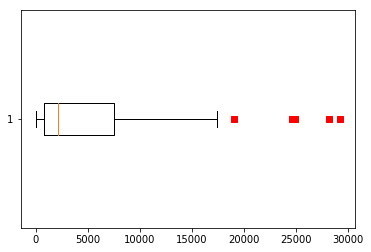

Summe:   353.716
Mean:      5.705


2018:   353.716 ┬  +160.832 (+83%)
2017:   192.884 ┘      


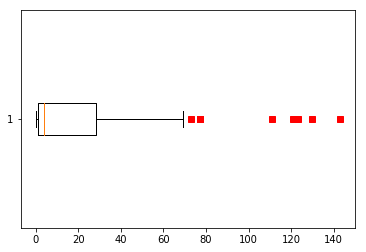

Summe 2018 :     1.583
Mean 2018 :         25


2018:     1.583 ┬      +588 (+59%)
2017:       995 ┘      


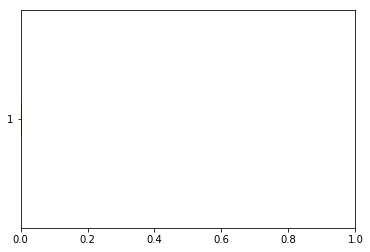

Mean 2018:   0% ┬   0%        
Mean 2017:   0% ┘      


Autor*in haben mehr als 12 Bearbeitungen im betrachteten Zeitraum 

2018:        16 ┬        +9 (+129%)
2017:         7 ┘      


Autor*in haben mehr als 120 Bearbeitungen im betrachteten Zeitraum

2018:         5 ┬        +4 (+400%)
2017:         1 ┘      


2018:    28.148 ┬    +9.763 (+53%)
2017:    18.385 ┘      


2018:         0 ┬        -1 (-100%)
2017:         1 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:    10.102 ┬    +1.851 (+22%)
2017:     8.251 ┘      


2018:       121 ┬      +111 (+1110%)
2017:        10 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:       711 ┬      +711        
2017:         0 ┘      


2018:         2 ┬        +2        
2017:         0 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     1.617 ┬    +1.617        
2017:         0 ┘      


2018:        18 ┬       +18        
2017:         0 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     2.275 ┬    +2.080 (+1067%)
2017:       195 ┘      


2018:       143 ┬      +143        
2017:         0 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:       807 ┬      +807        
2017:         0 ┘      


2018:        24 ┬       +24        
2017:         0 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:       424 ┬      +424        
2017:         0 ┘      


2018:         1 ┬        +1        
2017:         0 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:       796 ┬      +796        
2017:         0 ┘      


2018:        45 ┬       +45        
2017:         0 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     2.709 ┬    +2.709        
2017:         0 ┘      


2018:       122 ┬      +122        
2017:         0 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:    17.384 ┬    +9.466 (+120%)
2017:     7.918 ┘      


2018:        73 ┬       +61 (+508%)
2017:        12 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     4.733 ┬    +2.505 (+112%)
2017:     2.228 ┘      


2018:        24 ┬       +16 (+200%)
2017:         8 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:       431 ┬      +431        
2017:         0 ┘      


2018:         2 ┬        +2        
2017:         0 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     2.139 ┬      +187 (+10%)
2017:     1.952 ┘      


2018:         2 ┬       -20 (-91%)
2017:        22 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     1.316 ┬      +308 (+31%)
2017:     1.008 ┘      


2018:         0 ┬        -7 (-100%)
2017:         7 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     1.668 ┬      +817 (+96%)
2017:       851 ┘      


2018:         0 ┬        -6 (-100%)
2017:         6 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     1.259 ┬      +352 (+39%)
2017:       907 ┘      


2018:         0 ┬        -5 (-100%)
2017:         5 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:    29.222 ┬   +11.792 (+68%)
2017:    17.430 ┘      


2018:        69 ┬       +58 (+527%)
2017:        11 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:    12.542 ┬    +2.601 (+26%)
2017:     9.941 ┘      


2018:        20 ┬       +16 (+400%)
2017:         4 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     1.308 ┬      +852 (+187%)
2017:       456 ┘      


2018:       111 ┬      +111        
2017:         0 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:    14.837 ┬    +3.082 (+26%)
2017:    11.755 ┘      


2018:        30 ┬       +15 (+100%)
2017:        15 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     5.714 ┬    +3.680 (+181%)
2017:     2.034 ┘      


2018:       123 ┬      +114 (+1267%)
2017:         9 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:       202 ┬      +202        
2017:         0 ┘      


2018:        13 ┬       +13        
2017:         0 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     1.209 ┬    +1.209        
2017:         0 ┘      


2018:        63 ┬       +63        
2017:         0 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     3.456 ┬    +3.456        
2017:         0 ┘      


2018:        55 ┬       +55        
2017:         0 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:    12.269 ┬    +5.196 (+73%)
2017:     7.073 ┘      


2018:        68 ┬       +47 (+224%)
2017:        21 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:    14.439 ┬    +4.936 (+52%)
2017:     9.503 ┘      


2018:        77 ┬       +64 (+492%)
2017:        13 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:    17.012 ┬    +7.957 (+88%)
2017:     9.055 ┘      


2018:        77 ┬       +61 (+381%)
2017:        16 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:    11.531 ┬    +7.409 (+180%)
2017:     4.122 ┘      


2018:        48 ┬       +29 (+153%)
2017:        19 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     7.098 ┬    +2.235 (+46%)
2017:     4.863 ┘      


2018:       130 ┬       +77 (+145%)
2017:        53 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     2.063 ┬    +1.020 (+98%)
2017:     1.043 ┘      


2018:         2 ┬       -36 (-95%)
2017:        38 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     3.624 ┬    +2.403 (+197%)
2017:     1.221 ┘      


2018:         1 ┬       -24 (-96%)
2017:        25 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:    24.595 ┬   +19.146 (+351%)
2017:     5.449 ┘      


2018:         4 ┬      -150 (-97%)
2017:       154 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:    19.073 ┬    +1.589 ( +9%)
2017:    17.484 ┘      


2018:         5 ┬        -9 (-64%)
2017:        14 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:    12.405 ┬    -8.329 (-40%)
2017:    20.734 ┘      


2018:         5 ┬       -13 (-72%)
2017:        18 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     2.720 ┬    +1.696 (+166%)
2017:     1.024 ┘      


2018:         4 ┬       -87 (-96%)
2017:        91 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     2.940 ┬    +1.561 (+113%)
2017:     1.379 ┘      


2018:         2 ┬        -9 (-82%)
2017:        11 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     1.705 ┬      +840 (+97%)
2017:       865 ┘      


2018:         2 ┬       -20 (-91%)
2017:        22 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     3.034 ┬    +1.767 (+139%)
2017:     1.267 ┘      


2018:         5 ┬       -24 (-83%)
2017:        29 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     3.003 ┬    +1.839 (+158%)
2017:     1.164 ┘      


2018:         3 ┬       -21 (-88%)
2017:        24 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:    24.864 ┬   +18.156 (+271%)
2017:     6.708 ┘      


2018:         3 ┬       -36 (-92%)
2017:        39 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:    17.101 ┬   +14.469 (+550%)
2017:     2.632 ┘      


2018:         7 ┬       -16 (-70%)
2017:        23 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:       876 ┬        -9 ( -1%)
2017:       885 ┘      


2018:         1 ┬       -46 (-98%)
2017:        47 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     5.676 ┬    +3.621 (+176%)
2017:     2.055 ┘      


2018:         9 ┬      -102 (-92%)
2017:       111 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:       866 ┬      +364 (+73%)
2017:       502 ┘      


2018:         0 ┬        +0        
2017:         0 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:         0 ┬        +0        
2017:         0 ┘      


2018:         0 ┬        +0        
2017:         0 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:         0 ┬        +0        
2017:         0 ┘      


2018:         0 ┬        +0        
2017:         0 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     1.754 ┬    +1.228 (+233%)
2017:       526 ┘      


2018:         4 ┬        -3 (-43%)
2017:         7 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:       561 ┬      +561        
2017:         0 ┘      


2018:        16 ┬       +16        
2017:         0 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     1.306 ┬      +165 (+14%)
2017:     1.141 ┘      


2018:         2 ┬       -61 (-97%)
2017:        63 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     2.588 ┬    +1.074 (+71%)
2017:     1.514 ┘      


2018:         0 ┬       -14 (-100%)
2017:        14 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     7.640 ┬    +2.629 (+52%)
2017:     5.011 ┘      


2018:         0 ┬       -10 (-100%)
2017:        10 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     1.588 ┬      +795 (+100%)
2017:       793 ┘      


2018:         1 ┬        -4 (-80%)
2017:         5 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:         0 ┬        +0        
2017:         0 ┘      


2018:         0 ┬        +0        
2017:         0 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:       238 ┬      +238        
2017:         0 ┘      


2018:         9 ┬        +9        
2017:         0 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:         0 ┬        +0        
2017:         0 ┘      


2018:         0 ┬        +0        
2017:         0 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     2.758 ┬    +1.198 (+77%)
2017:     1.560 ┘      


2018:        15 ┬        -3 (-17%)
2017:        18 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:       367 ┬      +367        
2017:         0 ┘      


2018:         1 ┬        +1        
2017:         0 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:       606 ┬      +606        
2017:         0 ┘      


2018:         4 ┬        +4        
2017:         0 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     1.094 ┬    +1.094        
2017:         0 ┘      


2018:         9 ┬        +9        
2017:         0 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:       239 ┬      +239        
2017:         0 ┘      


2018:         3 ┬        +3        
2017:         0 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:       712 ┬      +712        
2017:         0 ┘      


2018:         4 ┬        +4        
2017:         0 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:       362 ┬      +362        
2017:         0 ┘      


2018:         1 ┬        +1        
2017:         0 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

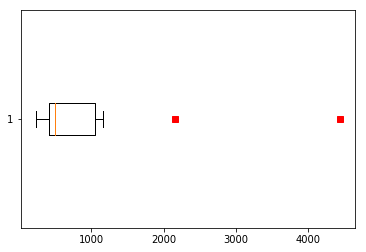

Summe:    10.799
Mean:      1.079


2018:    10.799 ┬    +5.623 (+109%)
2017:     5.176 ┘      


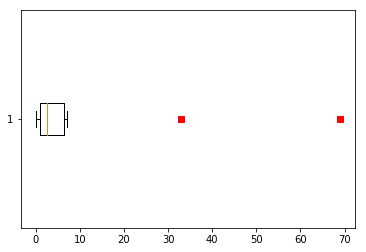

Summe 2018 :       122
Mean 2018 :         12


2018:       122 ┬      +120 (+6000%)
2017:         2 ┘      


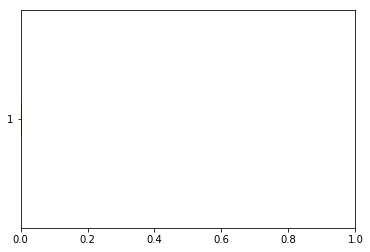

Mean 2018:   0% ┬   0%        
Mean 2017:   0% ┘      


Autor*in haben mehr als 12 Bearbeitungen im betrachteten Zeitraum 

2018:         2 ┬        +2        
2017:         0 ┘      


Autor*in haben mehr als 120 Bearbeitungen im betrachteten Zeitraum

2018:         0 ┬        +0        
2017:         0 ┘      


2018:     4.440 ┬      +366 ( +9%)
2017:     4.074 ┘      


2018:         0 ┬        +0        
2017:         0 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:       708 ┬      +233 (+49%)
2017:       475 ┘      


2018:         5 ┬        +3 (+150%)
2017:         2 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:       428 ┬      +428        
2017:         0 ┘      


2018:         1 ┬        +1        
2017:         0 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:       410 ┬      +410        
2017:         0 ┘      


2018:         1 ┬        +1        
2017:         0 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     2.151 ┬    +2.151        
2017:         0 ┘      


2018:        69 ┬       +69        
2017:         0 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     1.164 ┬    +1.164        
2017:         0 ┘      


2018:        33 ┬       +33        
2017:         0 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:       232 ┬      +232        
2017:         0 ┘      


2018:         1 ┬        +1        
2017:         0 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:       425 ┬      +425        
2017:         0 ┘      


2018:         1 ┬        +1        
2017:         0 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:       576 ┬       -51 ( -8%)
2017:       627 ┘      


2018:         4 ┬        +4        
2017:         0 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:       265 ┬      +265        
2017:         0 ┘      


2018:         7 ┬        +7        
2017:         0 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

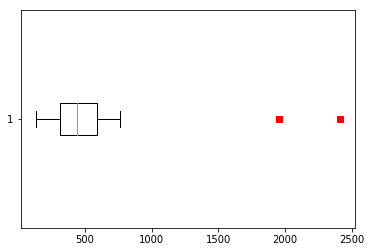

Summe:     8.934
Mean:        687


2018:     8.934 ┬       +97 ( +1%)
2017:     8.837 ┘      


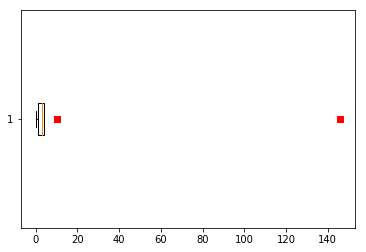

Summe 2018 :       184
Mean 2018 :         14


2018:       184 ┬      -182 (-50%)
2017:       366 ┘      


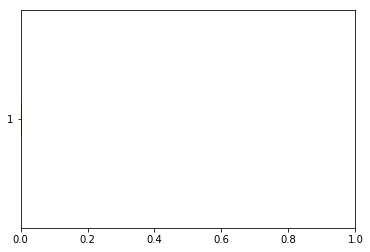

Mean 2018:   0% ┬   0%        
Mean 2017:   0% ┘      


Autor*in haben mehr als 12 Bearbeitungen im betrachteten Zeitraum 

2018:         4 ┬        -1 (-20%)
2017:         5 ┘      


Autor*in haben mehr als 120 Bearbeitungen im betrachteten Zeitraum

2018:         0 ┬        -1 (-100%)
2017:         1 ┘      


2018:     1.956 ┬      +513 (+36%)
2017:     1.443 ┘      


2018:         0 ┬        -1 (-100%)
2017:         1 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:       594 ┬      -130 (-18%)
2017:       724 ┘      


2018:         4 ┬        -3 (-43%)
2017:         7 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:       767 ┬       -75 ( -9%)
2017:       842 ┘      


2018:        10 ┬        -7 (-41%)
2017:        17 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:       171 ┬      +171        
2017:         0 ┘      


2018:         1 ┬        +1        
2017:         0 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:       389 ┬      +198 (+104%)
2017:       191 ┘      


2018:         3 ┬        -9 (-75%)
2017:        12 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:       443 ┬      +259 (+141%)
2017:       184 ┘      


2018:         3 ┬       -12 (-80%)
2017:        15 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:       132 ┬       +24 (+22%)
2017:       108 ┘      


2018:         0 ┬        -6 (-100%)
2017:         6 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:       458 ┬      -196 (-30%)
2017:       654 ┘      


2018:         2 ┬       -15 (-88%)
2017:        17 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:       285 ┬       -20 ( -7%)
2017:       305 ┘      


2018:         4 ┬        +3 (+300%)
2017:         1 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:       418 ┬      -107 (-20%)
2017:       525 ┘      


2018:         0 ┬        -9 (-100%)
2017:         9 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:     2.414 ┬      -730 (-23%)
2017:     3.144 ┘      


2018:       146 ┬      -127 (-47%)
2017:       273 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:       591 ┬      +181 (+44%)
2017:       410 ┘      


2018:        10 ┬        +5 (+100%)
2017:         5 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

2018:       316 ┬        +9 ( +3%)
2017:       307 ┘      


2018:         1 ┬        -2 (-67%)
2017:         3 ┘      


[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)

In [15]:
def report(node, level=1):
    h(("=" * level) + " " + node["name"] +  " " + ("=" * level), level,hid=node["name"])
    
    if len(node["children"]) > 0 and level <= 2:
        h("Artikel + Unterartikel: Seitenaufrufe 2018", 6)
        v1 = collect(views_new, node)
        plt.boxplot(v1, 0, "rs", 0)
        plt.show()
        
        print("Summe: %s" % d(sum(v1)))
        print("Mean:  %s" % d(np.mean(v1)))
        
        h("Artikel + Unterartikel: Differenz Bearbeitungen 2018 zu 2017", 6)
        
        v1 = sum(v1)
        v2 = sum(collect(views_old, node))
        
        print("2018: %s ┬ %s %s" % (d(v1), diff(v1,v2), quot(v1,v2)))
        print("2017: %s ┘      " %  d(v2))
        
        h("Artikel + Unterartikel: Bearbeitungen 2018", 6)
        v1 = collect(revs_new, node)
        plt.boxplot(v1, 0, "rs", 0)
        plt.show()
        
        print("Summe 2018 : %s" % d(sum(v1)))
        print("Mean 2018 :  %s" % d(np.mean(v1)))
        
        h("Artikel + Unterartikel: Differenz Bearbeitungen 2018 zu 2017", 6)
        
        v1 = sum(v1)
        v2 = sum(collect(revs_old, node))
        
        print("2018: %s ┬ %s %s" % (d(v1), diff(v1,v2), quot(v1,v2)))
        print("2017: %s ┘      " %  d(v2))
        
        h("Artikel + Unterartikel: Quotient Seitenaufrufe MFNF / Wikipedia", 6)
        wd_quot = collect(wp_quot_new, node)
        plt.boxplot(wd_quot, 0, "rs", 0)
        plt.xlim((0,1))
        plt.show()
        
        v1 = 100*np.mean(wd_quot)
        v2 = 100*np.mean(collect(wp_quot_old, node))
        
        print("Mean 2018: %s ┬ %s %s" % (dq(v1), diffq(v1,v2), quot(v1,v2)))
        print("Mean 2017: %s ┘      " %  dq(v2))
    
    if len(node["children"]) > 0 and level <= 2:
        a1 = collect_authors(authors_new, node)
        a2 = collect_authors(authors_old, node)

        h("Anzahl Autor*innen (Artikel + Unterartikel)", 5)
        display_markdown("Autor*in haben mehr als 12 Bearbeitungen im betrachteten Zeitraum ")

        v1 = len([k for k,v in a1.items() if v >= 12])
        v2 = len([k for k,v in a2.items() if v >= 12])

        print("2018: %s ┬ %s %s" % (d(v1), diff(v1,v2), quot(v1,v2)))
        print("2017: %s ┘      " %  d(v2))

        h("Anzahl sehr aktive Autor*innen (Artikel + Unterartikel)", 5)
        display_markdown("Autor*in haben mehr als 120 Bearbeitungen im betrachteten Zeitraum")

        v1 = len([k for k,v in a1.items() if v >= 120])
        v2 = len([k for k,v in a2.items() if v >= 120])

        print("2018: %s ┬ %s %s" % (d(v1), diff(v1,v2), quot(v1,v2)))
        print("2017: %s ┘      " %  d(v2))
    
    if "link" in node and node["link"]:
        h("Seitenaufrufe des Artikels '%s'" % node["link"], 5)
        
        v1 = views_new(node)
        v2 = views_old(node)
        
        print("2018: %s ┬ %s %s" % (d(v1), diff(v1,v2), quot(v1,v2)))
        print("2017: %s ┘      " %  d(v2))
        
        h("Bearbeitungen im Artikel '%s'" % node["link"], 5)
        
        v1 = revs_new(node)
        v2 = revs_old(node)
        
        print("2018: %s ┬ %s %s" % (d(v1), diff(v1,v2), quot(v1,v2)))
        print("2017: %s ┘      " %  d(v2))
        
        w = wp_title(node)
        
        if w:
            h("Vergleich der Seitenaufrufe zum Wikipedia-Artikel", 5)
            
            wp1 = wp_new(node)
            wp2 = wp_old(node)
            
            print("Wikipedia-Artikel: %s" % w)
            print("Views 2018:  %s ┬ %s %s" % (d(wp1), diff(wp1,wp2), quot(wp1,wp2)))
            print("Views 2017:  %s ┘      " %  d(wp2))
            print()
            print("MFNF / Wikipedia – 2018: %3.0f%%" % (wp_quot_new(node)*100))
            print("MFNF / Wikipedia – 2017: %3.0f%%" % (wp_quot_old(node)*100))
    
    display_markdown("[Zurück zum Inhaltsverzeichnis](#Inhaltsverzeichnis)")
    
    for child in node["children"]:
        report(child, level+1)

report(sitemap)

In [ ]:
a1 = collect_authors(authors_new, sitemap)
a2 = collect_authors(authors_old, sitemap)

h("Top-Bearbeiter 2018", 1)

for k,v in sorted(a1.items(), key=lambda x: x[1], reverse=True):
    if v >= 12:
        print(k, v)
        
h("Top-Bearbeiter 2017", 1)

for k,v in sorted(a2.items(), key=lambda x: x[1], reverse=True):
    if v >= 12:
        print(k, v)